<a href="https://colab.research.google.com/github/Shuvro-Ahmed/BBS-Research/blob/main/Migration_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Installing libraries
!pip install matplotlib ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00


In [ ]:
# @title Loading the dataset
import pandas as pd

# Reading the CSV file
file_path = '/content/Data Processed_15Nov23.csv'
df = pd.read_csv(file_path)
df.head()

Questionnaire No:      Slum Name    Slum Location  Ward No:  \
0                L1  Lakeside Slum  Bhodra Lakeside        19   
1               L10  Lakeside Slum  Bhodra Lakeside        19   
2              L100  Lakeside Slum  Bhodra Lakeside        19   
3              L101  Lakeside Slum  Bhodra Lakeside        19   
4              L102  Lakeside Slum  Bhodra Lakeside        19   

  Household  Head Name Sex of Household Head  Household Phone  \
0         Md. Shariful                  male     1.754504e+09   
1        Mosa. Joymala                female     1.781244e+09   
2        Md. Surat Ali                  male              NaN   
3           Md. Anisul                  male              NaN   
4          Md. Wahidul                  male              NaN   

   Phone on Request    NID No: Living with Family  ...  \
0               NaN  available                Yes  ...   
1               NaN  available                Yes  ...   
2      1.925180e+09  available                Yes  ...   
3      1.925180e+09  available                 No  ...   
4      1.821303e+09  available                Yes  ...   

          Major problem with latrines  \
0  Overcrowding, Distance to latrines   
1  Overcrowding, Distance to latrines   
2  Overcrowding, Distance to latrines   
3  Overcrowding, Distance to latrines   
4  Overcrowding, Distance to latrines   

   Any evidence of sexual harassment to adult women/girls for night time use of latrines?  \
0                                                Yes                                        
1                                                Yes                                        
2                                                Yes                                        
3                                                Yes                                        
4                                                Yes                                        

   Bathing Facility  Sexual harrasment drop  \
0  Open, Lake water                     Yes   
1  Open, Lake water                     Yes   
2              open                     Yes   
3              open                     Yes   
4              open                     Yes   

                              Problems with bathing:  Cooking facility:  \
0  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
1  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
2  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
3  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
4  Overcrowding, Safety issues, Privacy issues, L...           Firewood   

  Electricity/lighting facility:  Unnamed: 58  Unnamed: 59 Unnamed: 60  
0                  Kerosene lamp          NaN          NaN         NaN  
1                  Kerosene lamp          NaN          NaN         NaN  
2                  Kerosene lamp          NaN          NaN         NaN  
3                  Kerosene lamp          NaN          NaN         NaN  
4                  kerosene lamp          NaN          NaN         NaN  

[5 rows x 61 columns]

In [ ]:
# @title Summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 61 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Questionnaire No:                                                                       190 non-null    object 
 1   Slum Name                                                                               190 non-null    object 
 2   Slum Location                                                                           190 non-null    object 
 3   Ward No:                                                                                190 non-null    int64  
 4   Household  Head Name                                                                    190 non-null    object 
 5   Sex of Household Head                                                  

Dropping unnecessary columns before the encoded "Living condition in the selected slum" column in the excel sheet

In [ ]:
# @title Dopping columns
# # Define the columns
# columns_to_drop = ['Questionnaire No:', 'Household  Head Name', 'Household Phone', 'Climate Process','Climate Events','Non-climate drivers','Current principal occupation (livelihood means):']

# # Drop the specified columns in the original DataFrame
# df.drop(columns=columns_to_drop, inplace=True)

# df.info()

Mapping Values to proper names for data visualization task

In [ ]:
# @title Code
df['Source of drinking water'].unique()

array(['Tubewell', 'Supply', 'Tap', 'tap water', 'Tap watter/ Tubewell',
       'Tap water', 'Supply, Tubewell', 'Lake water', 'tubewell',
       'deepwell', 'tap'], dtype=object)

In [ ]:
# @title Code
mapping = {
    'tubewell': 'Tubewell',
    'Tap': 'Tap water',
    'tap water': 'Tap water',
    'supply ': 'Supply',
    'supply': 'Supply',
    'tap': 'Tap water'
}

In [ ]:
# @title Code
df['Source of drinking water'] = df['Source of drinking water'].replace(mapping)

In [ ]:
# @title Code
df['Source of drinking water'].unique()

array(['Tubewell', 'Supply', 'Tap water', 'Tap watter/ Tubewell',
       'Supply, Tubewell', 'Lake water', 'deepwell'], dtype=object)

In [ ]:
# @title Code
df['Who is responsible for collection of drinking water?'].unique()

array(['female', 'male', nan], dtype=object)

In [ ]:
# @title Code
df['Source of water for household activities'].unique()

array(['Tubewell', 'Lake water', 'Supply', 'lake water', 'Lake', 'Pond',
       'Tap', 'lake', 'Supply line water', 'Supple', 'Tap water',
       'tap water', 'Supply, tubewell', 'tubewell', 'Supply water',
       'tubetube', nan, 'tap'], dtype=object)

In [ ]:
# @title Code
mapping = {
    'tubewell': 'Tubewell',
    'tubetube': 'Tubewell',
    'lake water': 'Lake water',
    'Lake': 'Lake water',
    'Pond ': 'Pond',
    'Tap': 'Tap water',
    'tap water': 'Tap water',
    'tap ': 'Tap water',
    'Supply ': 'Supply',
    'supply': 'Supply',
    'Supply line water': 'Supply',
    'Supple': 'Supply',
    'Supply water': 'Supply'
}
df['Source of water for household activities'] = df['Source of water for household activities'].replace(mapping)
df['Source of water for household activities'].unique()

array(['Tubewell', 'Lake water', 'Supply', 'Pond', 'Tap water', 'lake',
       'Supply, tubewell', nan, 'tap'], dtype=object)

In [ ]:
# @title Code
df['Source of water for sanitation'].unique()

array(['Tubewell', 'Lake water', 'Supply', 'Pond', 'pond', 'lake water',
       'Lake', 'Tap', 'tap', 'Lakeside', nan, 'Supple', 'tap water',
       'tubewell', 'turbewell', 'tap gatherer'], dtype=object)

In [ ]:
# @title Code
mapping = {
    'tubewell': 'Tubewell',
    'turbewell': 'Tubewell',
    'lake water': 'Lake water',
    'Lake': 'Lake water',
    'Lakeside': 'Lake water',
    'pond': 'Pond',
    'Tap': 'Tap water',
    'tap': 'Tap water',
    'tap water': 'Tap water',
    'tap gatherer': 'Tap water',
    'tap  ': 'Tap water',
    'supply': 'Supply',
    'Supple': 'Supply',
    'supple': 'Supply'
}
df['Source of water for sanitation'] = df['Source of water for sanitation'].replace(mapping)
df['Source of water for sanitation'].unique()

array(['Tubewell', 'Lake water', 'Supply', 'Pond', 'Tap water', nan],
      dtype=object)

In [ ]:
# @title Code
df['Sanitation Facility'].unique()

array(['Open dumping', 'Private', 'Communal'], dtype=object)

One hot encoding needed for Major problem with latrines column

In [ ]:
# @title Code
df['Major problem with latrines'].unique()

array(['Overcrowding, Distance to latrines', 'Clogged Latrine',
       'Distance to latrines', 'Overcrpwding, Clogged latrines',
       'Clogged latrines', 'Overcrowding, Clogged latrines',
       'Clogged latrines, connected with drain',
       'Overcrowidng, Clogged latrines',
       'Overcrowding,  Distance to latrines',
       'Overcrowding, Distance to latrines, Clogged latrines',
       'Overcrowding', 'Far field, scary to go there as a elderly',
       'Overcrowding, Distance to latrines, Far from home',
       'Overcrowding, Distance to latrines, Scared  at night',
       'Open field where peopl walks around frequently',
       'Latrines being clogges', 'Overcorwding, Clogged latrines',
       'Overcrowding, Distance ot latrines, Clogged latrines', 'Field',
       nan, 'Distance to latrines, Open field',
       'Latrines being clogges, Polythene',
       'Overcrowding, Distance to latrines, Open field',
       'Distance to latrines, Clogged latrines',
       'Distance to latrin

In [ ]:
# @title Code
df['Any evidence of sexual harassment to adult women/girls for night time use of latrines?'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
# @title Code
mapping = {
    'yes': 'Yes',
    'yes ': 'Yes',
    'no': 'No'
}
df['Any evidence of sexual harassment to adult women/girls for night time use of latrines?'] = df['Any evidence of sexual harassment to adult women/girls for night time use of latrines?'].replace(mapping)
df['Any evidence of sexual harassment to adult women/girls for night time use of latrines?'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
# @title Code
df['Bathing Facility'].unique()

array(['Open, Lake water', 'open', 'Open', 'open, pond', 'communal, pond',
       'Open, Pond', 'Opne, lake water', 'opem, lake water', 'Private',
       nan, 'Communal, Open', 'open, Communal, Roadside Water tap',
       'Communal', 'Communal, Roadside tap water', 'open, Roadside tap',
       'open, tubewell', 'Communal, pond', 'communal',
       'Communal, tubewell'], dtype=object)

In [ ]:
# @title Code
mapping = {
    'open': 'Open',
    'Opne, lake water': 'Open, lake water',
    'opem, lake water': 'Open, lake water',
    'communal': 'Communal'
}
df['Bathing Facility'] = df['Bathing Facility'].replace(mapping)
df['Bathing Facility'].unique()

array(['Open, Lake water', 'Open', 'open, pond', 'communal, pond',
       'Open, Pond', 'Open, lake water', 'Private', nan, 'Communal, Open',
       'open, Communal, Roadside Water tap', 'Communal',
       'Communal, Roadside tap water', 'open, Roadside tap',
       'open, tubewell', 'Communal, pond', 'Communal, tubewell'],
      dtype=object)

One hot encoding needed for Problems with bathing column:

In [ ]:
# @title Code
df['Problems with bathing:'].unique()

array(['Overcrowding, Safety issues, Privacy issues, Lack of water',
       'Privacy issues', 'Overcrowding, Privacy issues', 'Lack of water',
       'Overcrowding, Safety issues, Privacy issues, Lack of water, Covered with curtain no safety assurance',
       'Overcrowding, Safety issues, Privacy issues, Lack of water, Lack of safety measure',
       'Overcrowding, Safety issues, Privacy issues, Lack of water, ',
       nan,
       'Overcrowding, Safety issues, Privacy issues, Lack of water, Lake',
       'Privacy issues, Lake', 'Safety issues, Lack of water',
       'Overcrowding, Safety isses, Privacy issues, Lack of water',
       'Overcrowding, Sefety issues, Privacy issues, Lack of water',
       'Overcrowding, Safety Isuees, Privacy issues, Lack of water',
       'Overcrowdinf, Safety issues, Privacy issues, Lack of water',
       'Overcrowding, Privacy issues, Safety issues, Lack of water ',
       'overcrowding,safety issues, pricavy issues, lack of water',
       'Privacy Iss

In [ ]:
# @title Code
df['Cooking facility:'].unique()

array(['Firewood', 'cow dung', 'Eats in hotel', 'Cow dung',
       'Cow dung, polythene', 'cow dung, polythene', nan, 'Cow Dung',
       'Firewood, Cow dung'], dtype=object)

In [ ]:
# @title Code
mapping = {
    'cow dung': 'Cow Dung',
    'Cow dung': 'Cow Dung'
}
df['Cooking facility:'] = df['Cooking facility:'].replace(mapping)
df['Cooking facility:'].unique()

array(['Firewood', 'Cow Dung', 'Eats in hotel', 'Cow dung, polythene',
       'cow dung, polythene', nan, 'Firewood, Cow dung'], dtype=object)

In [ ]:
# @title Code
df['Electricity/lighting facility:'].unique()

array(['Kerosene lamp', 'kerosene lamp', 'Battery', 'battery',
       'electricity', 'Kerosene lamp, Battery', 'electricity supply',
       'Neighbour electricity line', 'lamp', 'Harikane, lamp',
       'Sub-line from neighboring house', 'no, lamp', 'no,Solar', 'no',
       'Meter, Electricity line', 'Battery line', 'Line', nan, 'oil lamp',
       'Vattery', 'electricity line', 'Candle', 'Lamp',
       'KeroseneLamp, Battery', 'Kerosene Lamp', 'Kerpsene Lamp',
       'Taken from neighbour', "Don't have, kerosene lamp",
       'solar powered electricity', 'Kesosine lamp',
       'solar powered electricity and Battery', 'Oil Lamp', 'Solar',
       'Oil lamp'], dtype=object)

In [ ]:
# @title Code
mapping = {
    'kerosene lamp': 'Lamp',
    'Kerosene Lamp': 'Lamp',
    'Kerpsene Lamp': 'Lamp',
    'Kesosine lamp': 'Lamp',
    'Kerosene lamp': 'Lamp',
    'battery': 'Battery',
    'Battery line': 'Battery',
    'Vattery': 'Battery',
    'electricity supply': 'electricity',
    'Neighbour electricity line': 'electricity',
    'electricity line': 'electricity',
    'lamp': 'Lamp',
    'oil lamp': 'Lamp',
    'Oil Lamp': 'Lamp',
    'Oil lamp': 'Lamp',
    'solar powered electricity': 'Solar',
    'Solar ': 'Solar',
}
df['Electricity/lighting facility:'] = df['Electricity/lighting facility:'].replace(mapping)
df['Electricity/lighting facility:'].unique()

array(['Lamp', 'Battery', 'electricity', 'Kerosene lamp, Battery',
       'Harikane, lamp', 'Sub-line from neighboring house', 'no, lamp',
       'no,Solar', 'no', 'Meter, Electricity line', 'Line', nan, 'Candle',
       'KeroseneLamp, Battery', 'Taken from neighbour',
       "Don't have, kerosene lamp", 'Solar',
       'solar powered electricity and Battery'], dtype=object)

In [ ]:
# @title Code
df.head()

Questionnaire No:      Slum Name    Slum Location  Ward No:  \
0                L1  Lakeside Slum  Bhodra Lakeside        19   
1               L10  Lakeside Slum  Bhodra Lakeside        19   
2              L100  Lakeside Slum  Bhodra Lakeside        19   
3              L101  Lakeside Slum  Bhodra Lakeside        19   
4              L102  Lakeside Slum  Bhodra Lakeside        19   

  Household  Head Name Sex of Household Head  Household Phone  \
0         Md. Shariful                  male     1.754504e+09   
1        Mosa. Joymala                female     1.781244e+09   
2        Md. Surat Ali                  male              NaN   
3           Md. Anisul                  male              NaN   
4          Md. Wahidul                  male              NaN   

   Phone on Request    NID No: Living with Family  ...  \
0               NaN  available                Yes  ...   
1               NaN  available                Yes  ...   
2      1.925180e+09  available                Yes  ...   
3      1.925180e+09  available                 No  ...   
4      1.821303e+09  available                Yes  ...   

          Major problem with latrines  \
0  Overcrowding, Distance to latrines   
1  Overcrowding, Distance to latrines   
2  Overcrowding, Distance to latrines   
3  Overcrowding, Distance to latrines   
4  Overcrowding, Distance to latrines   

   Any evidence of sexual harassment to adult women/girls for night time use of latrines?  \
0                                                Yes                                        
1                                                Yes                                        
2                                                Yes                                        
3                                                Yes                                        
4                                                Yes                                        

   Bathing Facility  Sexual harrasment drop  \
0  Open, Lake water                     Yes   
1  Open, Lake water                     Yes   
2              Open                     Yes   
3              Open                     Yes   
4              Open                     Yes   

                              Problems with bathing:  Cooking facility:  \
0  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
1  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
2  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
3  Overcrowding, Safety issues, Privacy issues, L...           Firewood   
4  Overcrowding, Safety issues, Privacy issues, L...           Firewood   

  Electricity/lighting facility:  Unnamed: 58  Unnamed: 59 Unnamed: 60  
0                           Lamp          NaN          NaN         NaN  
1                           Lamp          NaN          NaN         NaN  
2                           Lamp          NaN          NaN         NaN  
3                           Lamp          NaN          NaN         NaN  
4                           Lamp          NaN          NaN         NaN  

[5 rows x 61 columns]

In [ ]:
# @title Code
df["Number of families (not person) living in the same house"].unique()

array([1, 0, 4, 6, 2, 5, 3])

In [ ]:
# @title Code
mapping = {
    '1': 'one',
    '2': 'two',
    '3': 'three',
    '4': 'four',
    '5': 'five',
    '6': 'six'
}
df['Number of families (not person) living in the same house'] = df['Number of families (not person) living in the same house'].replace(mapping)
df['Number of families (not person) living in the same house'].unique()

array([1, 0, 4, 6, 2, 5, 3])

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('New processed data.csv', index=False)

Visualizations Start from here

Gender based distribution (Household head)

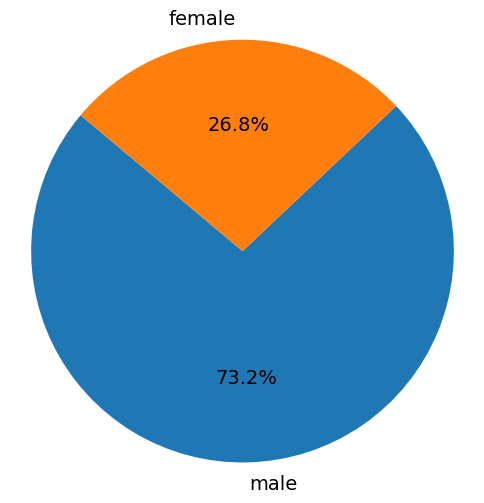

In [ ]:
# @title Code for Pie chart
import matplotlib.pyplot as plt
gender_counts = df["Sex of Household Head"].value_counts()
# Pie chart labels and sizes
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})

# Add a title
# plt.title("Distribution of Gender of Household Head")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Total Distribution of Living with Family

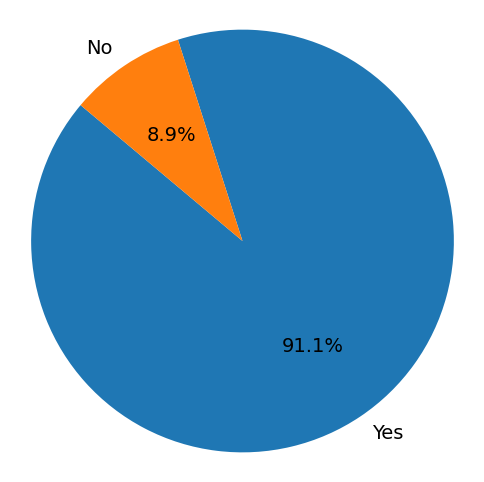

In [ ]:
# @title Code for Total Distribution of Living with Family
# Create a static pie chart for "Living with Family"
living_with_family_counts = df["Living with Family"].value_counts()
labels_static = living_with_family_counts.index
sizes_static = living_with_family_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes_static, labels=labels_static, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
# plt.title("Total Distribution of Living with Family")
plt.axis('equal')
plt.show()

Living with Family (for male & female household head - from left to right respectively)

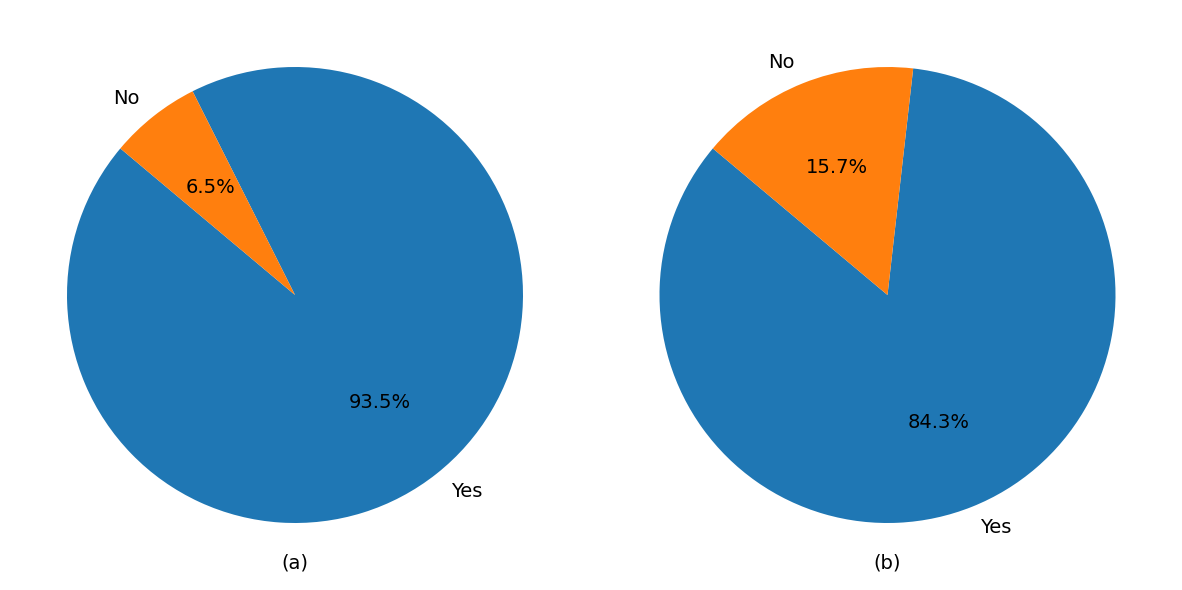

In [ ]:
# @title Code for no label static pie chart
import matplotlib.pyplot as plt

# Filtering the data based on the gender of the household head
male_data = df[df['Sex of Household Head'] == 'male']['Living with Family']
female_data = df[df['Sex of Household Head'] == 'female']['Living with Family']

# Counting the values for living with family for each gender
male_counts = male_data.value_counts()
female_counts = female_data.value_counts()

# Setting up the figure and axes for the pie charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart for male household heads
ax[0].pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
# ax[0].set_title('Living with Family - Male Household Head')

# Plotting the pie chart for female household heads
ax[1].pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
# ax[1].set_title('Living with Family - Female Household Head')

# Adding a central title
# plt.suptitle('Comparison of Living with Family Among Male and Female Household Heads')

# Adding labels "a" and "b" below the pie charts
ax[0].text(0, -1.2, '(a)', ha='center', fontsize=14)
ax[1].text(0, -1.2, '(b)', ha='center', fontsize=14)

# Display the pie charts
plt.tight_layout()
plt.show()

In [ ]:
# @title Code for dynamic pie chart with labels
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Function to generate pie chart
def generate_pie_chart(gender):
    # Filter the DataFrame based on the selected gender
    filtered_data = df[df["Sex of Household Head"] == gender]

    # Calculate the counts for "Living with Family"
    counts = filtered_data["Living with Family"].value_counts()

    # Create a pie chart
    labels = counts.index
    sizes = counts.values

    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
    plt.title(f"Distribution of Living with Family for {gender} Household Heads")
    plt.axis('equal')
    plt.show()

# Get unique values for "Sex of Household Head" and "Living with Family"
unique_genders = df["Sex of Household Head"].unique()

# Create an interactive widget to choose the gender
@interact(gender=widgets.Dropdown(options=unique_genders, description="Gender:"))
def plot_pie_chart(gender):
    generate_pie_chart(gender)

interactive(children=(Dropdown(description='Gender:', options=('male', 'female'), value='male'), Output()), _d…

Number of Families (not person) in the Same House Visualization

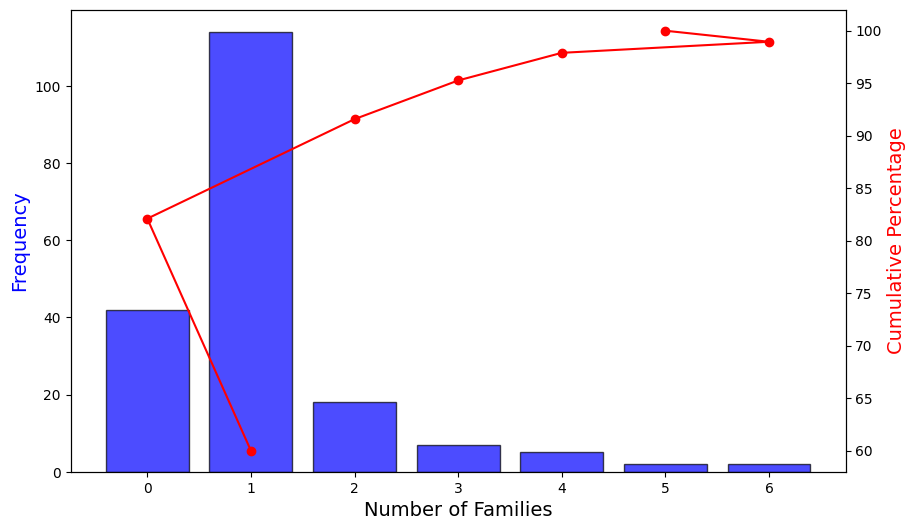

In [ ]:
# @title Code (Not sorted frequencies)
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Calculate the cumulative percentage
cumulative_percentage = value_counts.cumsum() / value_counts.sum() * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax1.bar(value_counts.index, value_counts, color='blue', alpha=0.7, edgecolor='k', label='Frequency')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(value_counts.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Frequency", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

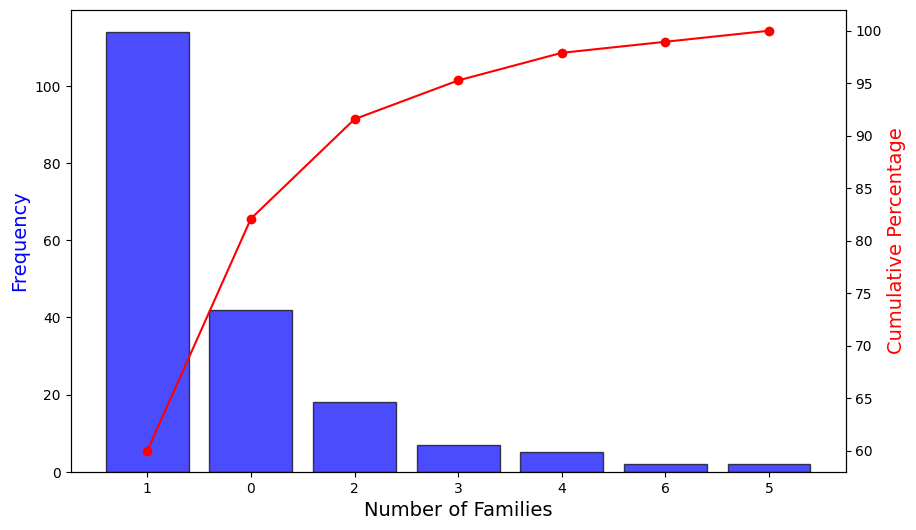

In [ ]:
# @title Code (sorted frequencies)
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Sort values based on frequencies in descending order
sorted_values = value_counts.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = sorted_values.cumsum() / sorted_values.sum() * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with sorted x-axis values
ax1.bar(range(len(sorted_values)), sorted_values, color='blue', alpha=0.7, edgecolor='k', label='Frequency')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_values)), cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set x-axis ticks and labels based on sorted values
ax1.set_xticks(range(len(sorted_values)))
ax1.set_xticklabels(sorted_values.index)

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Frequency", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

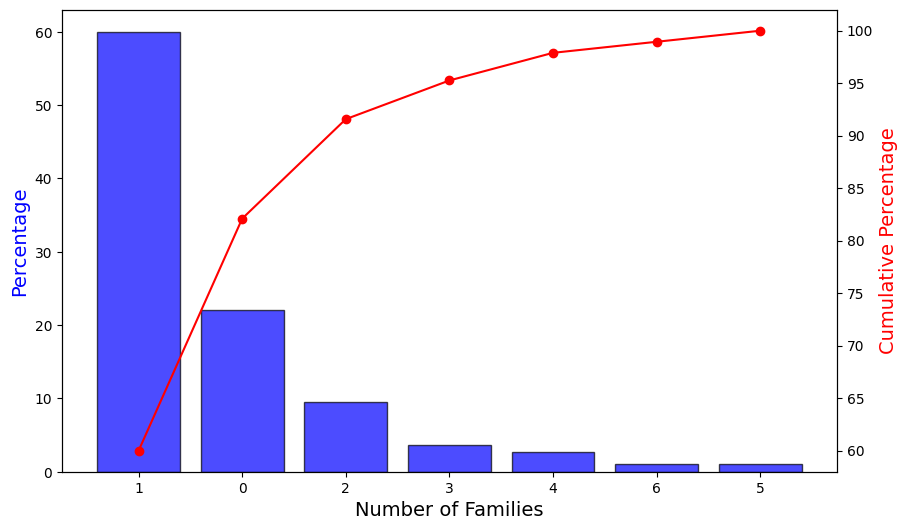

In [ ]:
# @title Code for Sorted frequencies as percentage
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Sort values based on frequencies in descending order
sorted_values = value_counts.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = sorted_values.cumsum() / sorted_values.sum() * 100

# Convert frequencies to percentages
percentage_values = (sorted_values / sorted_values.sum()) * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with sorted x-axis values and percentage values on the y-axis
ax1.bar(range(len(sorted_values)), percentage_values, color='blue', alpha=0.7, edgecolor='k', label='Percentage')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_values)), cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set x-axis ticks and labels based on sorted values
ax1.set_xticks(range(len(sorted_values)))
ax1.set_xticklabels(sorted_values.index)

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Percentage", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

Pareto Chart - Number of Families in the Same House for {gender} Household Heads

In [ ]:
# @title Code for interactive mode (Based on gender)
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate Pareto chart
def generate_pareto_chart(gender):
    # Filter the DataFrame based on the selected gender
    filtered_data = df[df["Sex of Household Head"] == gender]

    # Calculate the frequency of each value
    value_counts = filtered_data["Number of families (not person) living in the same house"].value_counts()

    # Sort values based on frequencies in descending order
    sorted_values = value_counts.sort_values(ascending=False)

    # Calculate the cumulative percentage
    cumulative_percentage = sorted_values.cumsum() / sorted_values.sum() * 100

    # Create a Pareto chart
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the bar chart with sorted x-axis values and percentage values on the y-axis
    ax1.bar(range(len(sorted_values)), (sorted_values / sorted_values.sum()) * 100, color='blue', alpha=0.7, edgecolor='k', label='Percentage')

    # Create a secondary y-axis for the cumulative percentage line
    ax2 = ax1.twinx()
    ax2.plot(range(len(sorted_values)), cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

    # Set x-axis ticks and labels based on sorted values
    ax1.set_xticks(range(len(sorted_values)))
    ax1.set_xticklabels(sorted_values.index)

    # Set labels and title
    ax1.set_xlabel("Number of Families", fontsize=14)
    ax1.set_ylabel("Percentage", color='blue', fontsize=14)
    ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
    # plt.title(f"Pareto Chart - Number of Families in the Same House for {gender} Household Heads")

    # Display the chart
    plt.show()

# Get unique values for "Sex of Household Head"
unique_genders = df["Sex of Household Head"].unique()

# Create an interactive widget to choose the gender
@interact(gender=widgets.Dropdown(options=unique_genders, description="Gender:"))
def plot_pareto_chart(gender):
    generate_pareto_chart(gender)

interactive(children=(Dropdown(description='Gender:', options=('male', 'female'), value='male'), Output()), _d…

Pareto Chart where 0 is 1 for number of families - with percentage

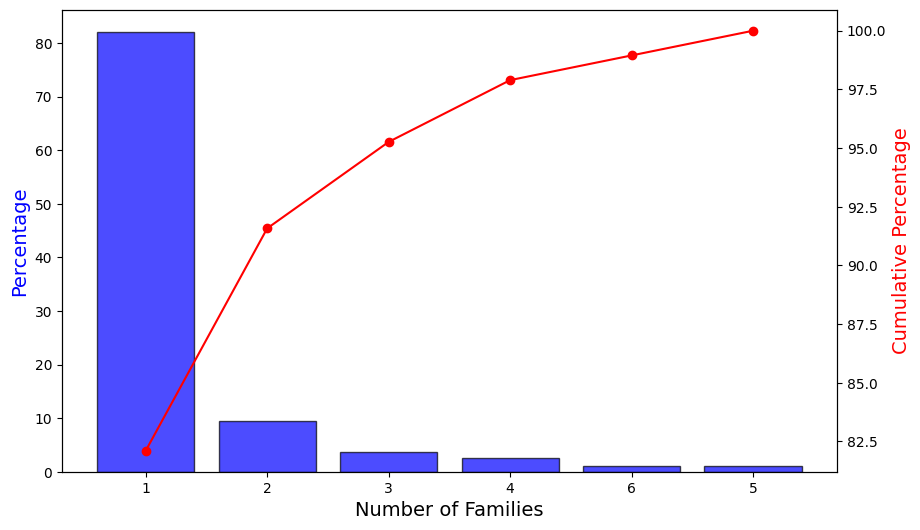

In [ ]:
#map
#df["Number of families (not person) living in the same house"].unique()

# @title Code
mapping = {
    0: 1
}
df['Number of families (not person) living in the same house'] = df['Number of families (not person) living in the same house'].replace(mapping)
# df['Number of families (not person) living in the same house'].unique()

# @title Code for Sorted frequencies as percentage
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Sort values based on frequencies in descending order
sorted_values = value_counts.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = sorted_values.cumsum() / sorted_values.sum() * 100

# Convert frequencies to percentages
percentage_values = (sorted_values / sorted_values.sum()) * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with sorted x-axis values and percentage values on the y-axis
ax1.bar(range(len(sorted_values)), percentage_values, color='blue', alpha=0.7, edgecolor='k', label='Percentage')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_values)), cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set x-axis ticks and labels based on sorted values
ax1.set_xticks(range(len(sorted_values)))
ax1.set_xticklabels(sorted_values.index)

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Percentage", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

Pareto chart where 0 is 1 for pareto chart - with frequencies

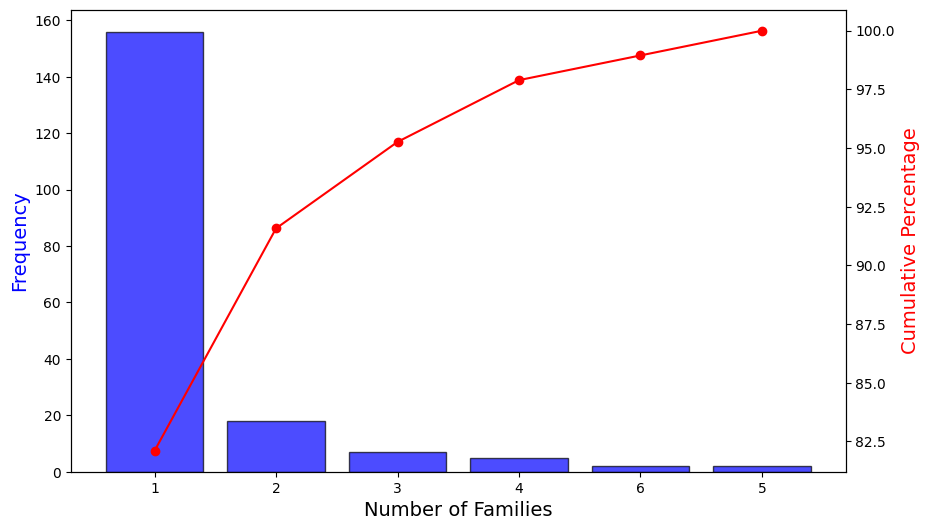

In [ ]:
# @title Code (sorted frequencies)
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Sort values based on frequencies in descending order
sorted_values = value_counts.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = sorted_values.cumsum() / sorted_values.sum() * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with sorted x-axis values
ax1.bar(range(len(sorted_values)), sorted_values, color='blue', alpha=0.7, edgecolor='k', label='Frequency')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_values)), cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set x-axis ticks and labels based on sorted values
ax1.set_xticks(range(len(sorted_values)))
ax1.set_xticklabels(sorted_values.index)

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Frequency", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

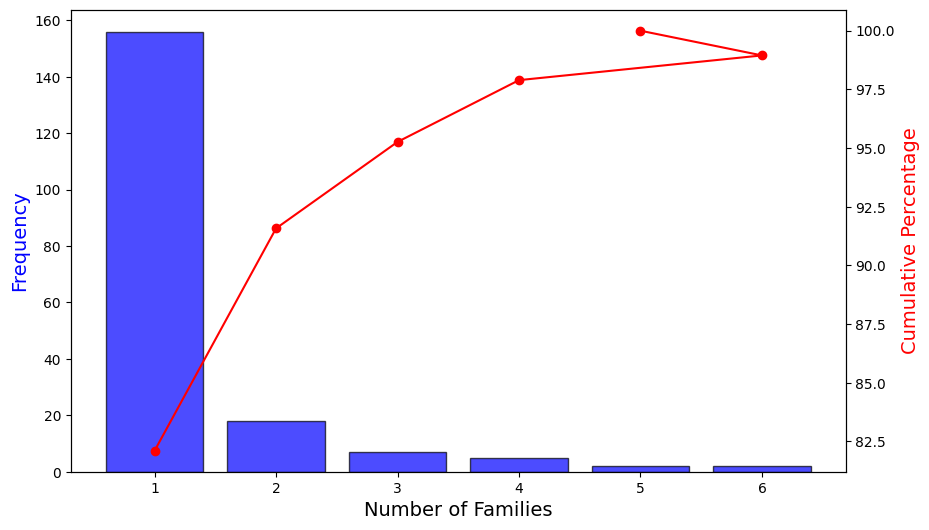

In [ ]:
mapping = {
    0: 1
}
df['Number of families (not person) living in the same house'] = df['Number of families (not person) living in the same house'].replace(mapping)
# @title Code (Not sorted frequencies)
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Calculate the cumulative percentage
cumulative_percentage = value_counts.cumsum() / value_counts.sum() * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax1.bar(value_counts.index, value_counts, color='blue', alpha=0.7, edgecolor='k', label='Frequency')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(value_counts.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Frequency", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

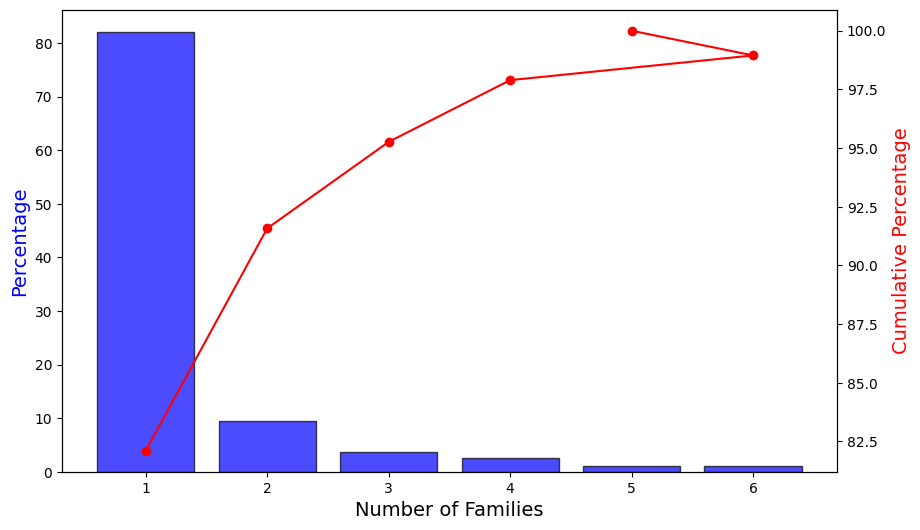

In [ ]:
mapping = {
    0: 1
}
df['Number of families (not person) living in the same house'] = df['Number of families (not person) living in the same house'].replace(mapping)
# @title Code (Not sorted percentage)
# Calculate the frequency of each value
value_counts = df["Number of families (not person) living in the same house"].value_counts()

# Calculate the cumulative percentage
cumulative_percentage = value_counts.cumsum() / value_counts.sum() * 100

# Convert frequencies to percentages
percentage_values = (sorted_values / sorted_values.sum()) * 100

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with sorted x-axis values and percentage values on the y-axis
ax1.bar(value_counts.index, percentage_values, color='blue', alpha=0.7, edgecolor='k', label='Percentage')

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(value_counts.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Set labels and title
ax1.set_xlabel("Number of Families", fontsize=14)
ax1.set_ylabel("Percentage", color='blue', fontsize=14)
ax2.set_ylabel("Cumulative Percentage", color='red', fontsize=14)
# plt.title("Pareto Chart - Number of Families (not person) in the Same House")

# Display the chart
plt.show()

Who is responsible for collection of drinking water Visualization

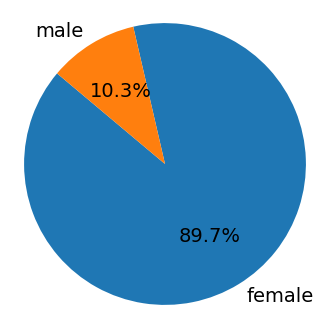

interactive(children=(Dropdown(description='Gender:', options=('male', 'female'), value='male'), Output()), _d…

In [ ]:
# @title Code
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Function to generate pie chart
def generate_pie_chart(gender):
    # Filter the DataFrame based on the selected gender
    filtered_data = df[df["Sex of Household Head"] == gender]

    # Calculate the counts for "Who is responsible for collection of drinking water?"
    counts = filtered_data["Who is responsible for collection of drinking water?"].value_counts()

    # Create a pie chart
    labels = counts.index
    sizes = counts.values

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
    # plt.title(f"Distribution of Who is responsible for collection of drinking water? for {gender} Household Heads")
    plt.axis('equal')
    plt.show()

# Get unique values for "Sex of Household Head" and "Who is responsible for collection of drinking water?"
unique_genders = df["Sex of Household Head"].unique()

# Create a static pie chart for "Who is responsible for collection of drinking water?"
living_with_family_counts = df["Who is responsible for collection of drinking water?"].value_counts()
labels_static = living_with_family_counts.index
sizes_static = living_with_family_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes_static, labels=labels_static, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
# plt.title("Total Distribution of Who is responsible for collection of drinking water?")
plt.axis('equal')
plt.show()

# Create an interactive widget to choose the gender
@interact(gender=widgets.Dropdown(options=unique_genders, description="Gender:"))
def plot_pie_chart(gender):
    generate_pie_chart(gender)

Top 5 Principle Livelihoods Bar chart - WORKING

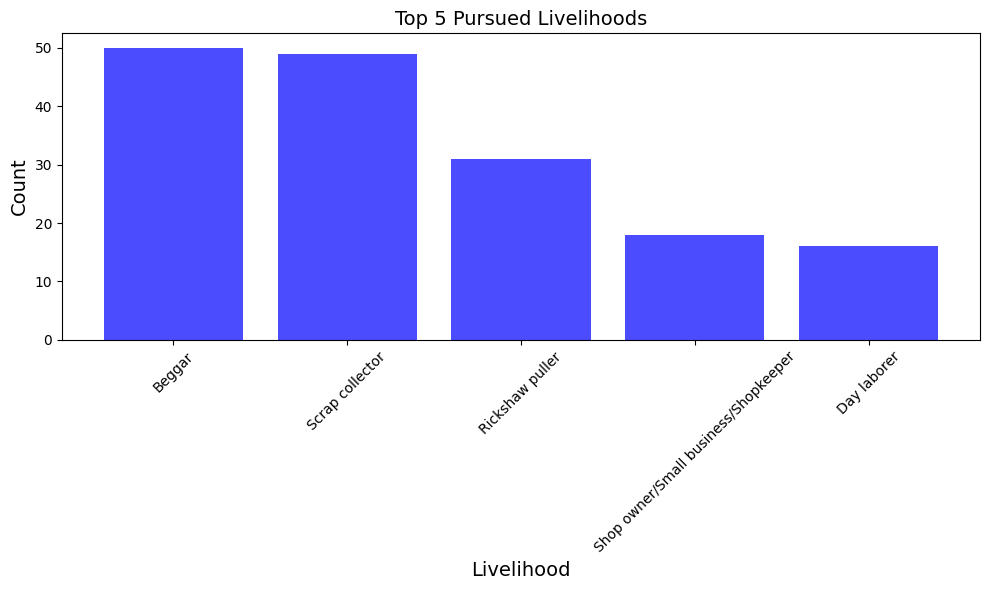

In [ ]:
# @title Code
# Sum the columns to get the total counts for each livelihood
livelihood_columns = ["Motor/Steel Mechanic", "Auto/Van driver", "Tailor",	"Day laborer", "Security guard", "Farmer",	"Shop owner/Small business/Shopkeeper", "Household worker", "Rickshaw puller",	"Mason",	"Beggar",	"Scrap collector"]

# Filter the DataFrame to include only livelihood columns
df_livelihoods = df[livelihood_columns]

# Sum the livelihood columns to get the total counts for each livelihood
livelihood_counts = df_livelihoods.sum()

# Sort and select the top 5 pursued livelihoods
top_5_livelihoods = livelihood_counts.sort_values(ascending=False).head(5)

# Create a histogram for the top 5 livelihoods
plt.figure(figsize=(10, 6))
plt.bar(top_5_livelihoods.index, top_5_livelihoods.values, color='blue', alpha=0.7)
plt.title("Top 5 Pursued Livelihoods", fontsize=14)
plt.xlabel("Livelihood", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

Total Principle Livelihoods Pie chart

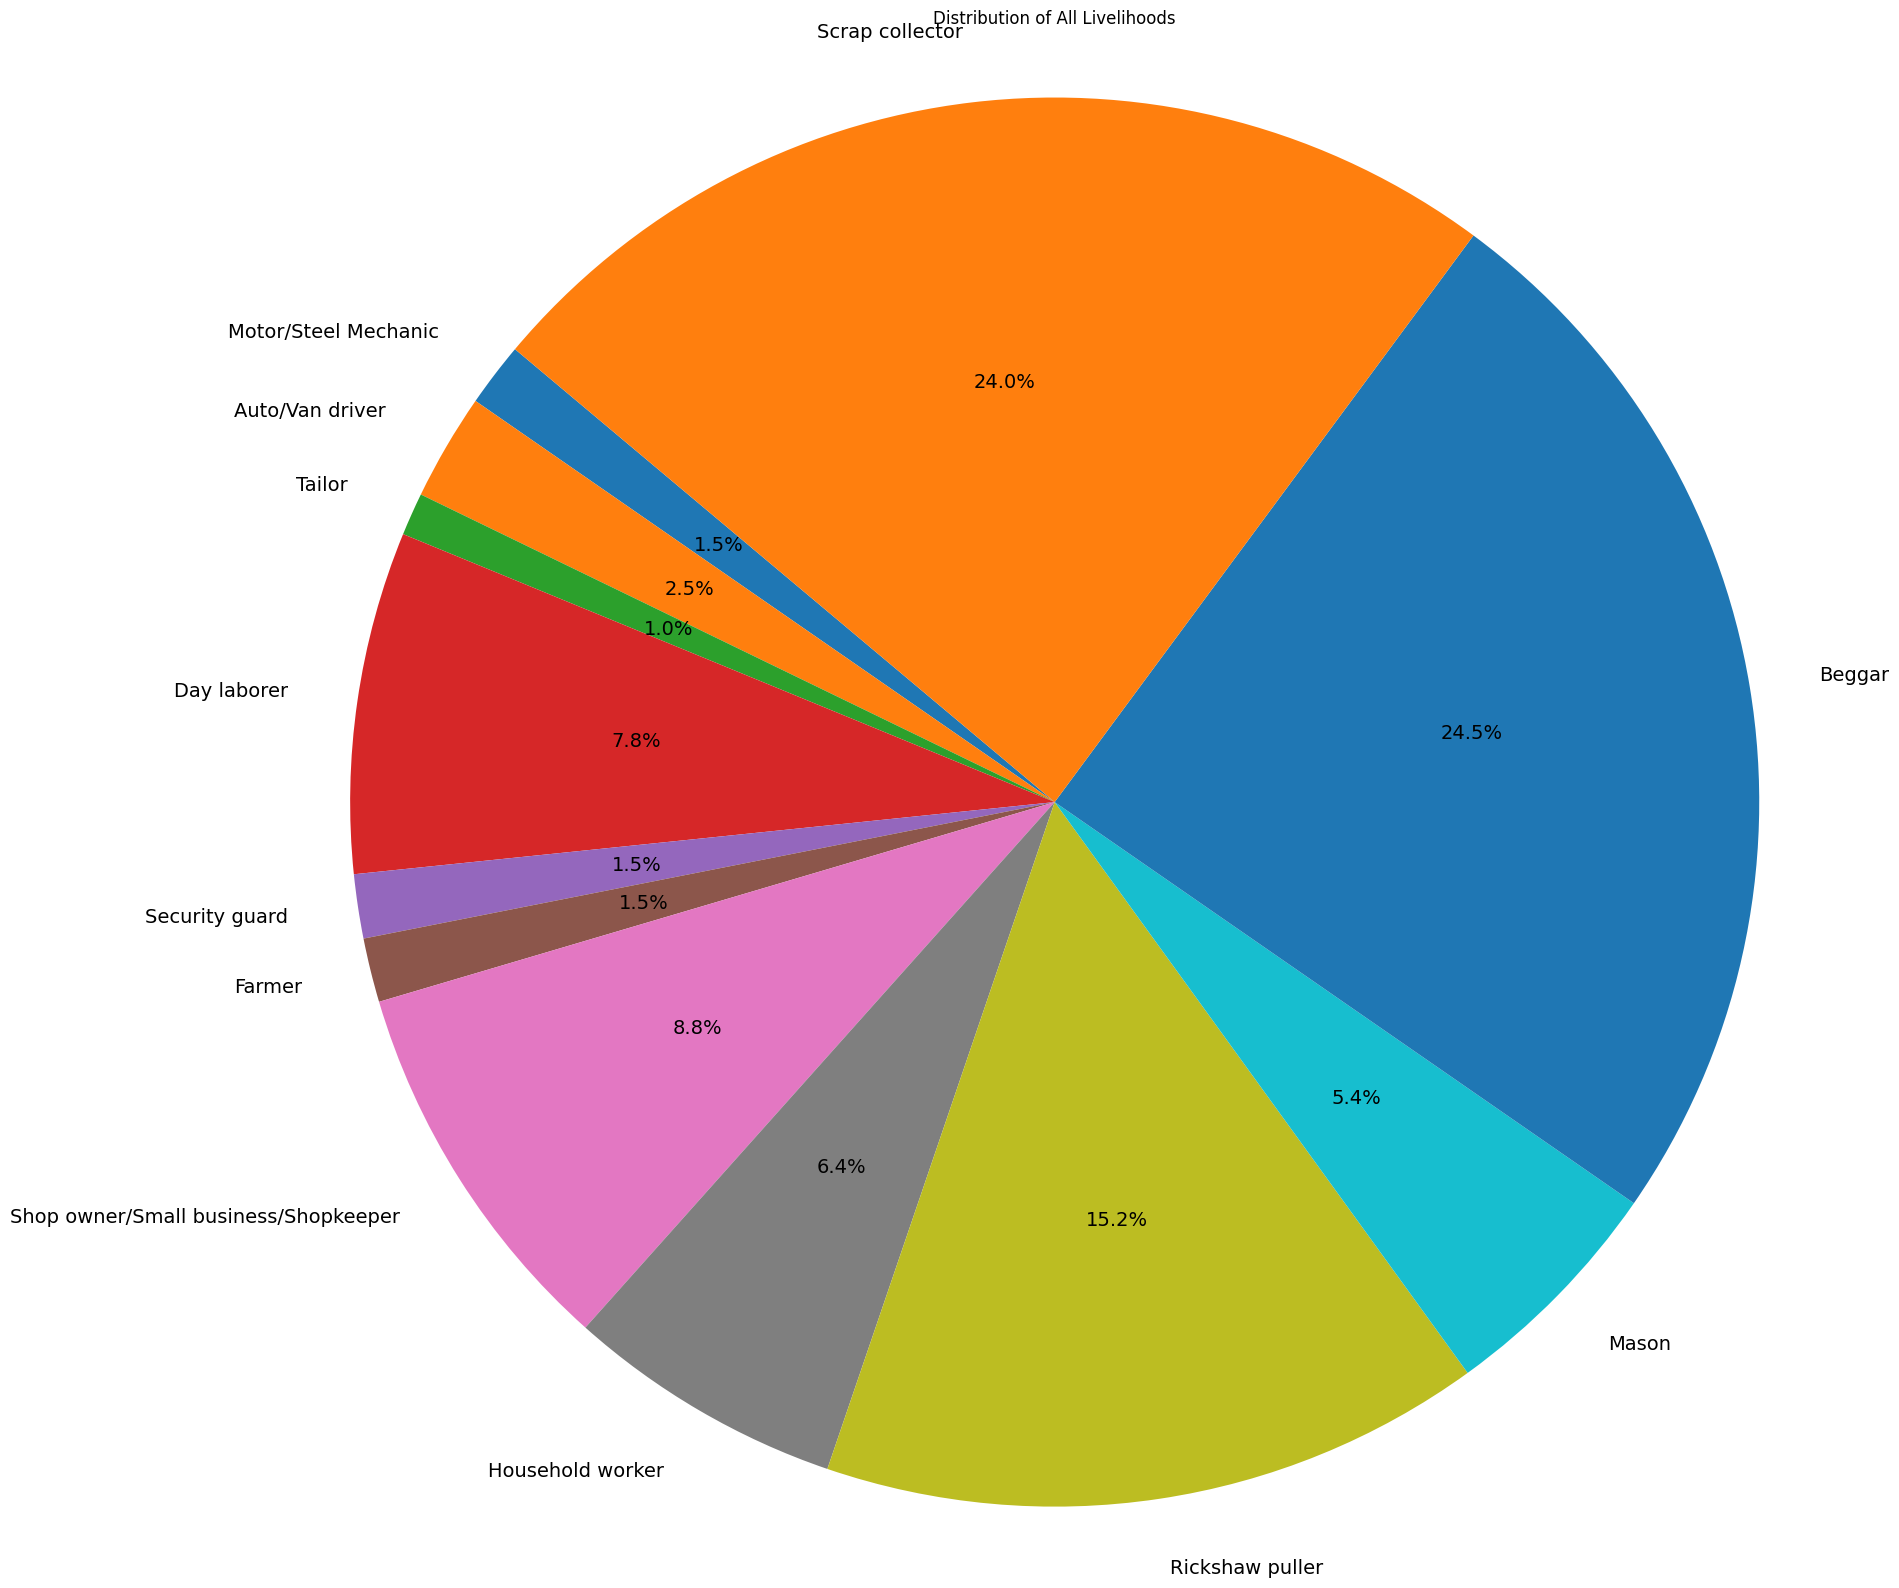

In [ ]:
# @title Code
# Sum the livelihood columns to get the total counts for all livelihoods
livelihood_counts = df_livelihoods.sum()

# Create a pie chart for all livelihoods
labels = livelihood_counts.index
sizes = livelihood_counts.values

plt.figure(figsize=(20, 20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title("Distribution of All Livelihoods")
plt.axis('equal')
plt.show()

Total Principle Livelihoods Horizontal Bar chart

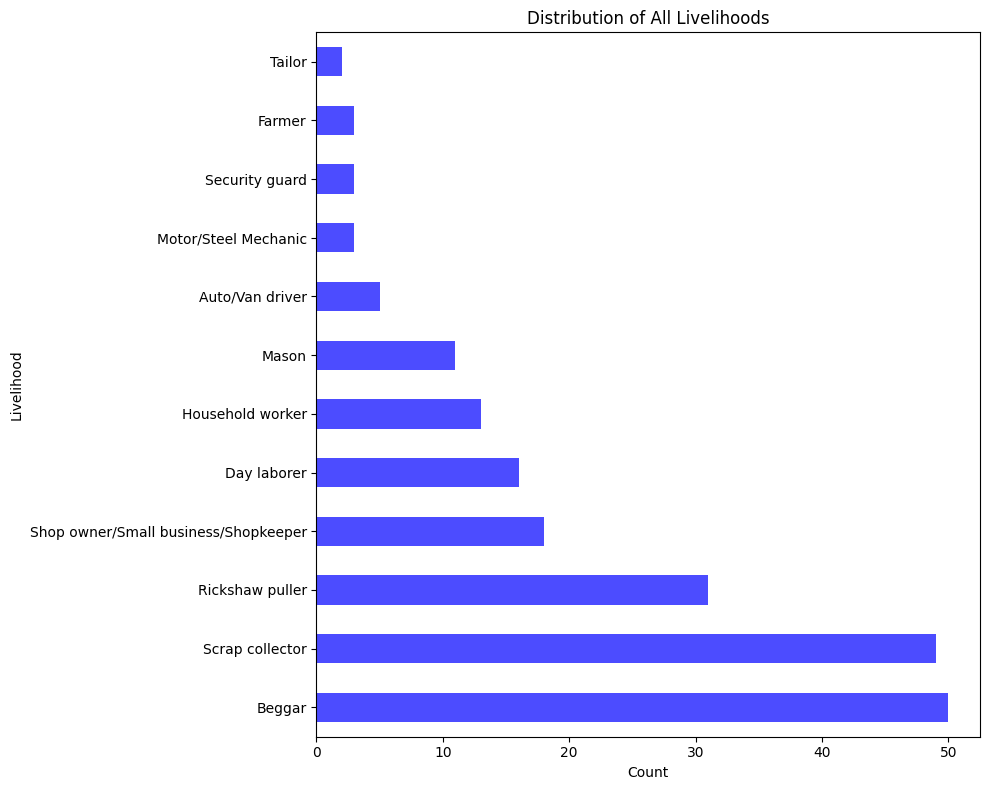

Output()

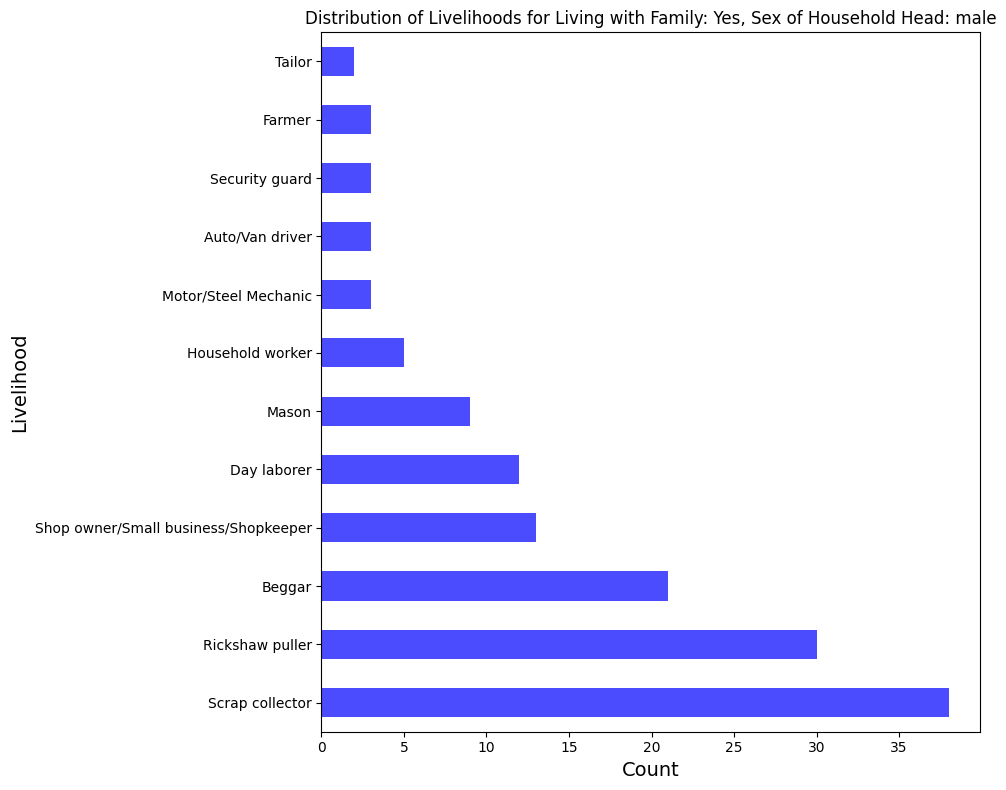

In [ ]:
# @title Code
from IPython.display import display, clear_output
from ipywidgets import interact, HBox, VBox, Label

livelihood_columns = ["Motor/Steel Mechanic", "Auto/Van driver", "Tailor",	"Day laborer", "Security guard", "Farmer",	"Shop owner/Small business/Shopkeeper", "Household worker", "Rickshaw puller",	"Mason",	"Beggar",	"Scrap collector"]

# Sum the livelihood columns to get the total counts for all livelihoods
livelihood_counts = df_livelihoods.sum()

# Sort the livelihood counts in descending order
livelihood_counts = livelihood_counts.sort_values(ascending=False)

# Create a horizontal bar chart for all livelihoods
plt.figure(figsize=(10, 8))
livelihood_counts.plot(kind='barh', color='blue', alpha=0.7)
plt.title("Distribution of All Livelihoods")
plt.xlabel("Count")
plt.ylabel("Livelihood")
plt.tight_layout()
plt.show()

# Function to generate the dynamic horizontal bar chart
def generate_bar_chart(living_with_family, sex_of_head):
    # Filter the DataFrame based on the selected "Living with Family" value and "Sex of Household Head"
    filtered_data = df[(df["Living with Family"] == living_with_family) & (df["Sex of Household Head"] == sex_of_head)]

    # Sum the livelihood columns to get the total counts for the selected group
    livelihood_counts = filtered_data[livelihood_columns].sum()

    # Sort the livelihood counts in descending order
    livelihood_counts = livelihood_counts.sort_values(ascending=False)

    # Create the horizontal bar chart for the selected group
    plt.figure(figsize=(10, 8))
    livelihood_counts.plot(kind='barh', color='blue', alpha=0.7)
    plt.title(f"Distribution of Livelihoods for Living with Family: {living_with_family}, Sex of Household Head: {sex_of_head}")
    plt.xlabel("Count", fontsize=14)
    plt.ylabel("Livelihood", fontsize=14)
    plt.tight_layout()
    plt.show()

# Get unique values for "Living with Family" and "Sex of Household Head"
unique_living_with_family = df["Living with Family"].unique()
unique_sex_of_head = df["Sex of Household Head"].unique()

# Create dropdown widgets for "Living with Family" and "Sex of Household Head"
living_with_family_dropdown = widgets.Dropdown(options=unique_living_with_family, description="Family:")
sex_of_head_dropdown = widgets.Dropdown(options=unique_sex_of_head, description="Gender:")

# Create instructions as an HTML-formatted text
instructions_text = widgets.HTML(value="<strong>Select Living with Family and Sex of Household Head:</strong>")

# Create an interactive widget
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output()
            generate_bar_chart(living_with_family_dropdown.value, sex_of_head_dropdown.value)

living_with_family_dropdown.observe(on_change)
sex_of_head_dropdown.observe(on_change)

# Display the widgets and chart
output = widgets.Output()
display(VBox([instructions_text, HBox([living_with_family_dropdown, sex_of_head_dropdown])]))
display(output)
generate_bar_chart(living_with_family_dropdown.value, sex_of_head_dropdown.value)

Age distribution

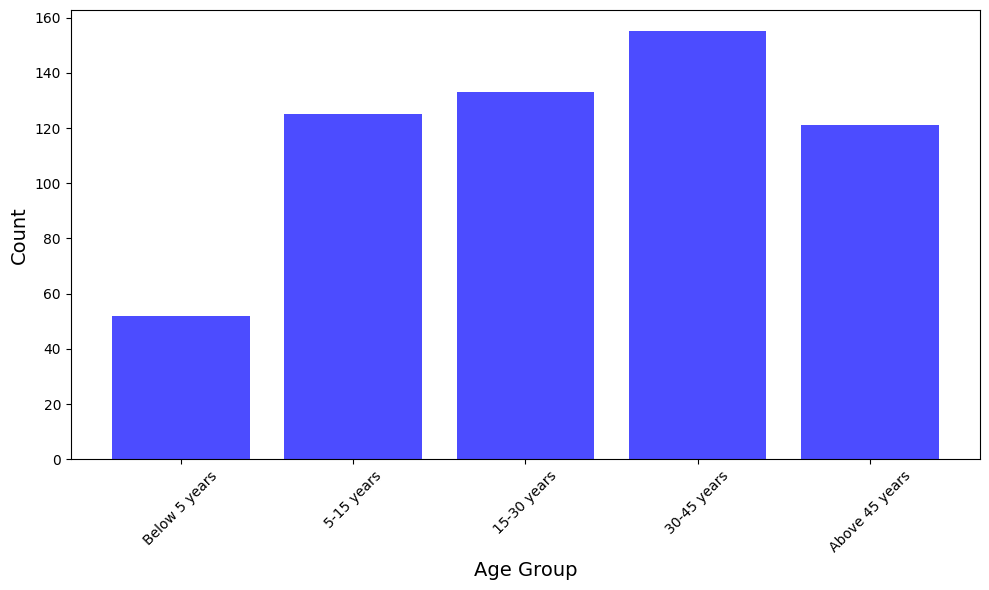

Output()

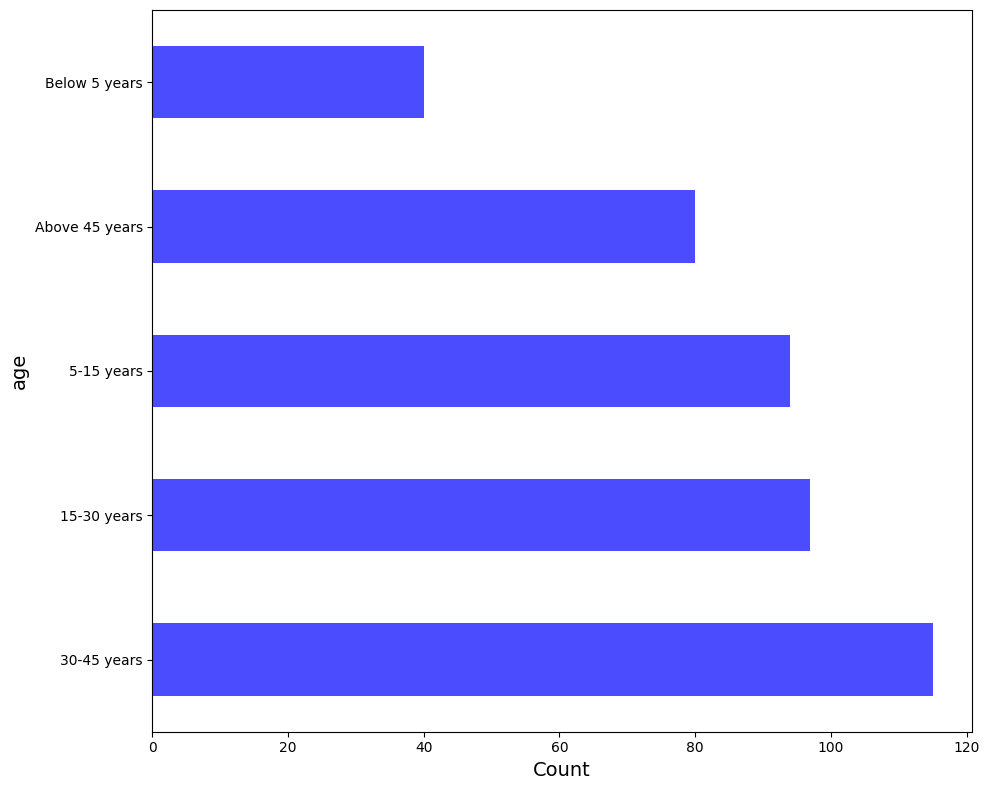

In [ ]:
# @title Code
# Replace "Unknown" with 0 and convert the columns to numeric
age_columns = ["Below 5 years", "5-15 years", "15-30 years", "30-45 years", "Above 45 years"]
df[age_columns] = df[age_columns].replace("Unknown", 0).apply(pd.to_numeric)

# Calculate the sum of age groups
age_sums = df[age_columns].sum()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(age_sums.index, age_sums.values, color='blue', alpha=0.7)
# plt.title("Total Age Group Distribution")
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to generate the dynamic horizontal bar chart
def generate_bar_chart(living_with_family, sex_of_head, migrated):
    # Filter the DataFrame based on the selected "Living with Family" value and "Sex of Household Head"
    filtered_data = df[(df["Living with Family"] == living_with_family) & (df["Sex of Household Head"] == sex_of_head) & (df["Migrated"] == migrated)]

    # Sum the age columns to get the total counts for the selected group
    age_counts = filtered_data[age_columns].sum()

    # Sort the age counts in descending order
    age_counts = age_counts.sort_values(ascending=False)

    # Create the horizontal bar chart for the selected group
    plt.figure(figsize=(10, 8))
    age_counts.plot(kind='barh', color='blue', alpha=0.7)
    # plt.title(f"Distribution of age for Living with Family: {living_with_family}, Sex of Household Head: {sex_of_head}, Migration: {migrated}")
    plt.xlabel("Count", fontsize=14)
    plt.ylabel("age", fontsize=14)
    plt.tight_layout()
    plt.show()

# Get unique values for "Living with Family", "Sex of Household Head" and "Migrated"
unique_living_with_family = df["Living with Family"].unique()
unique_sex_of_head = df["Sex of Household Head"].unique()
unique_migrated = df["Migrated"].unique()

# Create dropdown widgets for "Living with Family" and "Sex of Household Head" and "Migrated"
living_with_family_dropdown = widgets.Dropdown(options=unique_living_with_family, description="Family:")
sex_of_head_dropdown = widgets.Dropdown(options=unique_sex_of_head, description="Gender:")
migrated_dropdown = widgets.Dropdown(options=unique_migrated, description="Migrated:")

# Create instructions as an HTML-formatted text
instructions_text = widgets.HTML(value="<strong>Select Family Status, Gender of Household Head and Migration Status:</strong>")

# Create an interactive widget
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output()
            generate_bar_chart(living_with_family_dropdown.value, sex_of_head_dropdown.value, migrated_dropdown.value)

living_with_family_dropdown.observe(on_change)
sex_of_head_dropdown.observe(on_change)
migrated_dropdown.observe(on_change)

# Display the widgets and chart
output = widgets.Output()
display(VBox([instructions_text, HBox([living_with_family_dropdown, sex_of_head_dropdown, migrated_dropdown])]))
display(output)
generate_bar_chart(living_with_family_dropdown.value, sex_of_head_dropdown.value, migrated_dropdown.value)

Climate Events

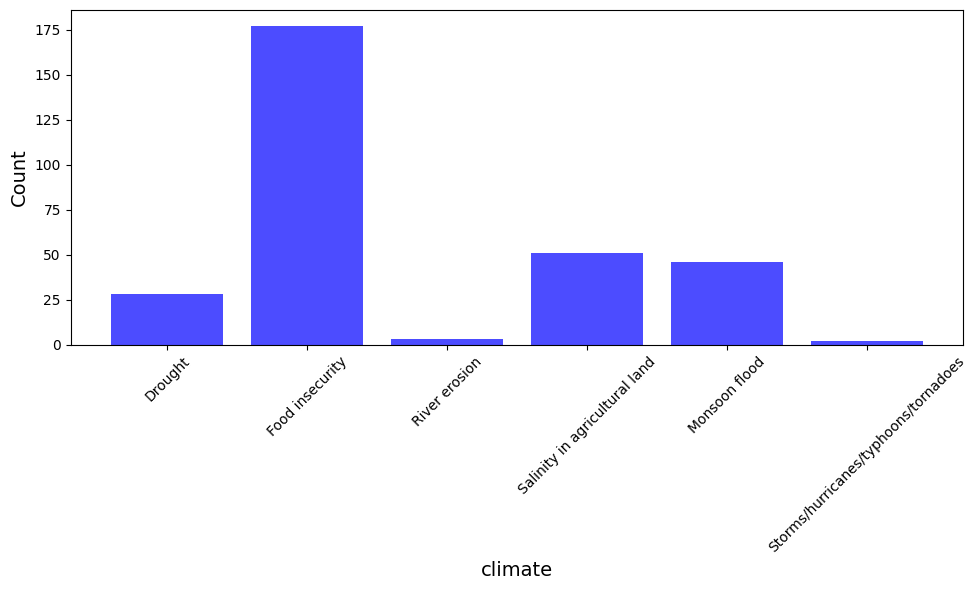

In [ ]:
# @title Code
# Sum the columns to get the total counts for each climate
climate_events = ["Drought", "Food insecurity", "River erosion", "Salinity in agricultural land", "Monsoon flood", "Storms/hurricanes/typhoons/tornadoes"]

# Filter the DataFrame to include only climate columns
df_climates = df[climate_events]

# Sum the climate columns to get the total counts for each climate
climate_counts = df_climates.sum()

# # Sort and select the top 5 pursued climates
# top_5_climates = climate_counts.sort_values(ascending=False).head(5)

# Create a histogram for the top 5 climates
plt.figure(figsize=(10, 6))
plt.bar(climate_counts.index, climate_counts.values, color='blue', alpha=0.7)
# plt.title("Top climate Events")
plt.xlabel("climate", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

Non Climate Drivers

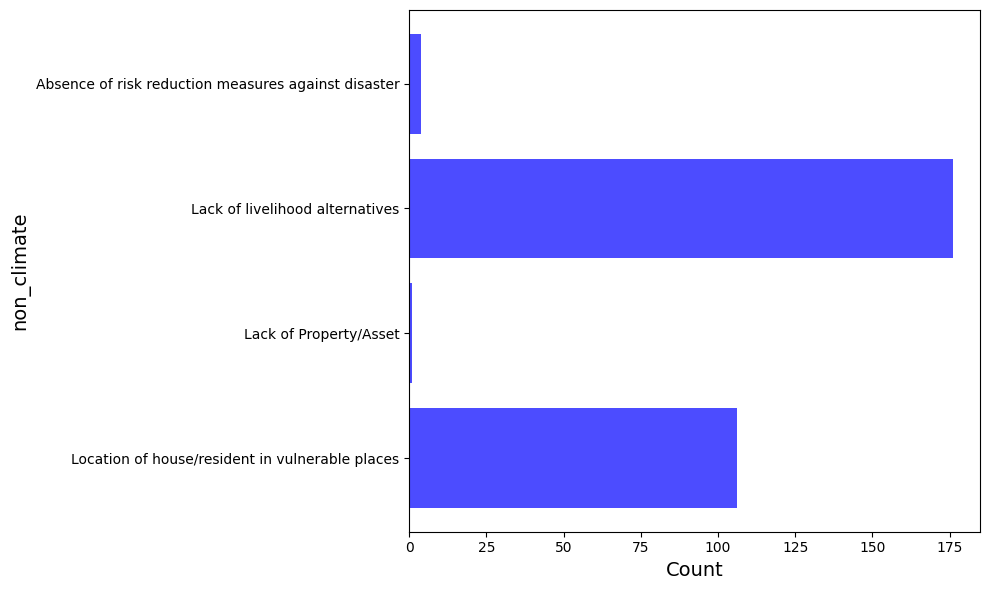

In [ ]:
# @title Code
# new_column_names = {
#     "Absence of risk reduction measures against disaster": "Lack of risk reduction",
#     "Came during war": "War",
#     "In search of work": "Work",
#     "Lack of disaster/ climate education/ awareness": "Lack of awareness",
#     "Location of house/ resident in vulnerable places": "Vulnerable location",
#     "Lack of job opportunity": "Lack of job",
#     "Property related issues": "Property"
# }

# # Use the rename method to rename the columns
# df = df.rename(columns=new_column_names)
# Sum the columns to get the total counts for each non_climate
non_climate_events = ["Absence of risk reduction measures against disaster", "Lack of livelihood alternatives", "Lack of Property/Asset", "Location of house/resident in vulnerable places"]
# Filter the DataFrame to include only non_climate columns
df_non_climates = df[non_climate_events]

# Sum the non_climate columns to get the total counts for each non_climate
non_climate_counts = df_non_climates.sum()

# # Sort and select the top 5 pursued non_climates
# top_5_non_climates = non_climate_counts.sort_values(ascending=False).head(5)

# Create a histogram for the top 5 non_climates
plt.figure(figsize=(10, 6))
plt.barh(non_climate_counts.index, non_climate_counts.values, color='blue', alpha=0.7)  # Use barh for horizontal bars
# plt.title("Top non_climate Events")
plt.xlabel("Count", fontsize=14)
plt.ylabel("non_climate", fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top

# Display the bar chart
plt.tight_layout()
plt.show()

Climate vs non climate drivers

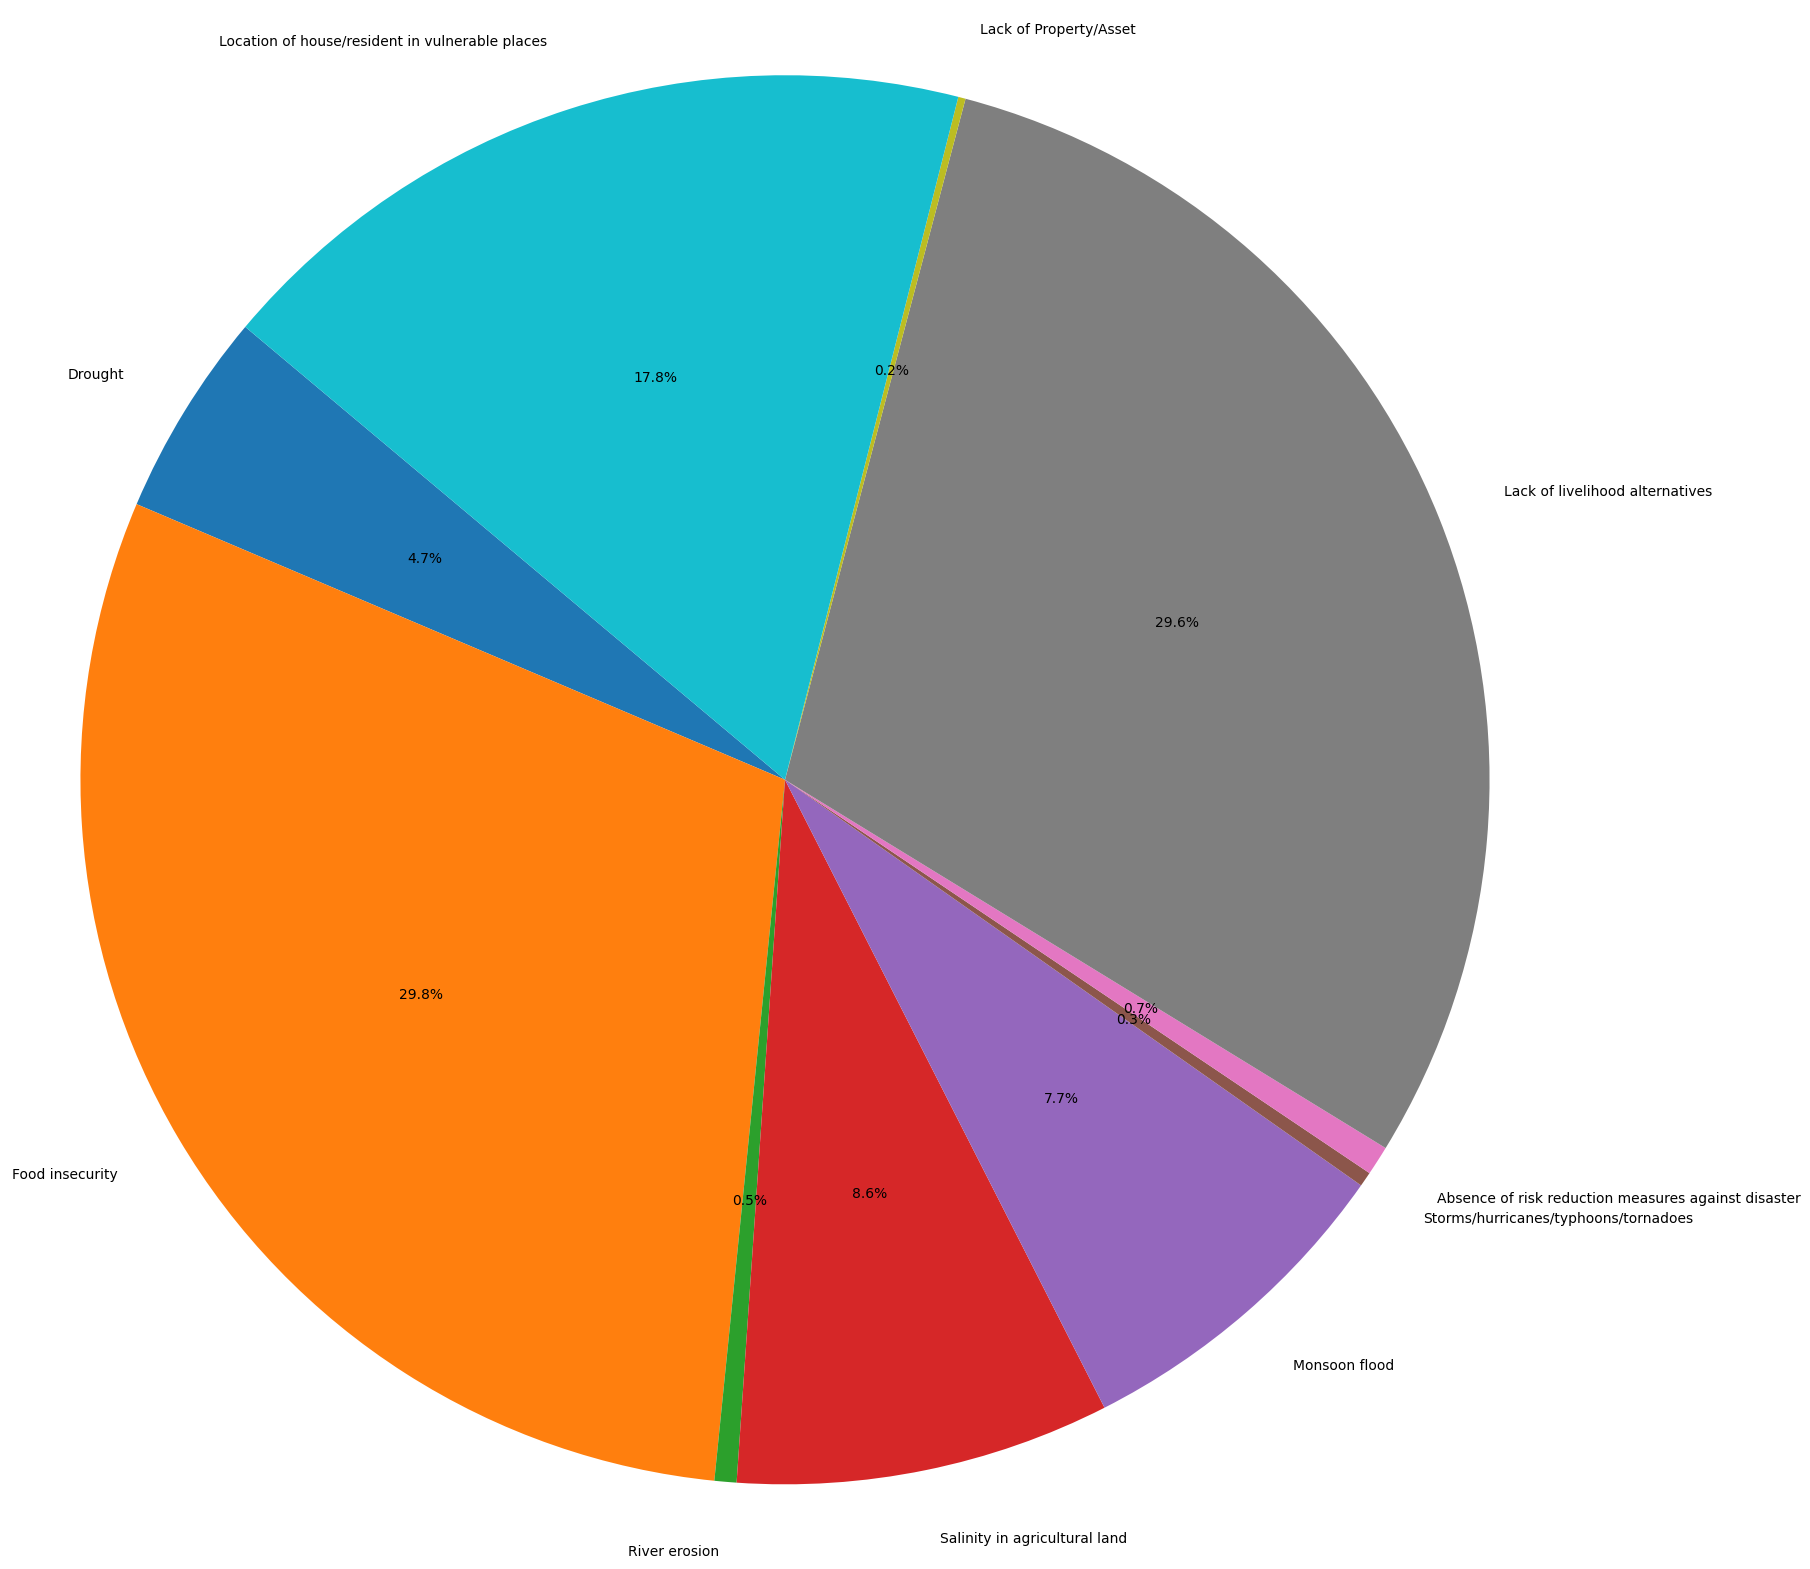

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Sum the climate and non-climate counts
total_counts = pd.concat([climate_counts, non_climate_counts])

# Create a pie chart
plt.figure(figsize=(20, 20))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title("Total Climate and Non-Climate Events")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

Top 5 Combined Events (Climate and Non-Climate

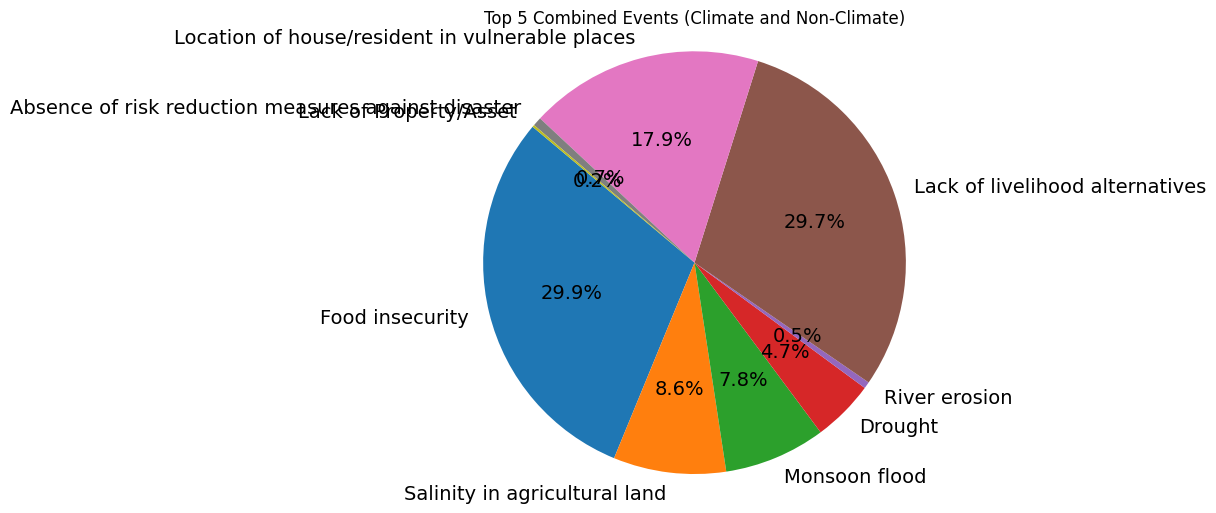

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Sort and select the top 5 climate and non-climate events
top_5_climates = climate_counts.sort_values(ascending=False).head(5)
top_5_non_climates = non_climate_counts.sort_values(ascending=False).head(5)

# Concatenate the top 5 climate and top 5 non-climate events
top_5_combined = pd.concat([top_5_climates, top_5_non_climates])

# Create a pie chart for the top 5 combined events
plt.figure(figsize=(6, 6))
plt.pie(top_5_combined, labels=top_5_combined.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title("Top 5 Combined Events (Climate and Non-Climate)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

Total Climate and Non-Climate Events

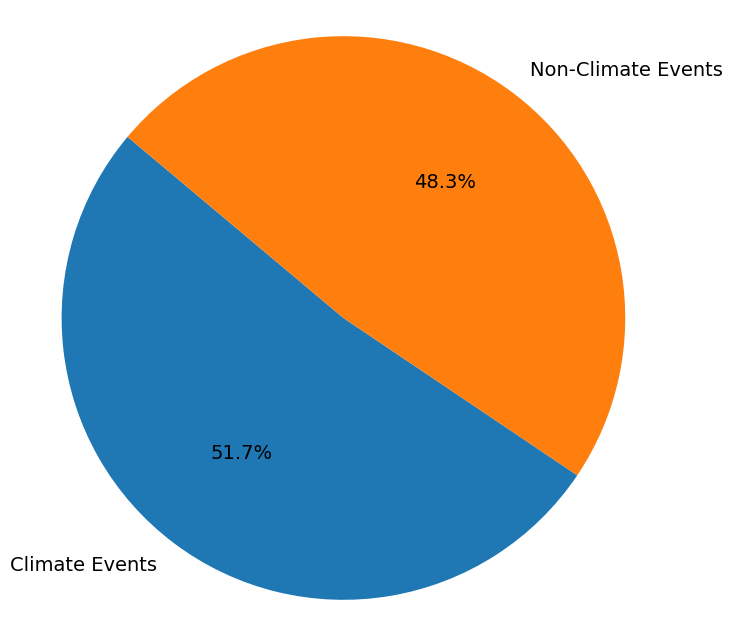

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Sum the counts for climate and non-climate events
total_climate_count = climate_counts.sum()
total_non_climate_count = non_climate_counts.sum()

# Create data for the pie chart
data = [total_climate_count, total_non_climate_count]
labels = ['Climate Events', 'Non-Climate Events']

# Create a pie chart for total climate and non-climate events
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
# plt.title("Total Climate and Non-Climate Events")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

Cooking Facilities

Distribution of All Cooking facility

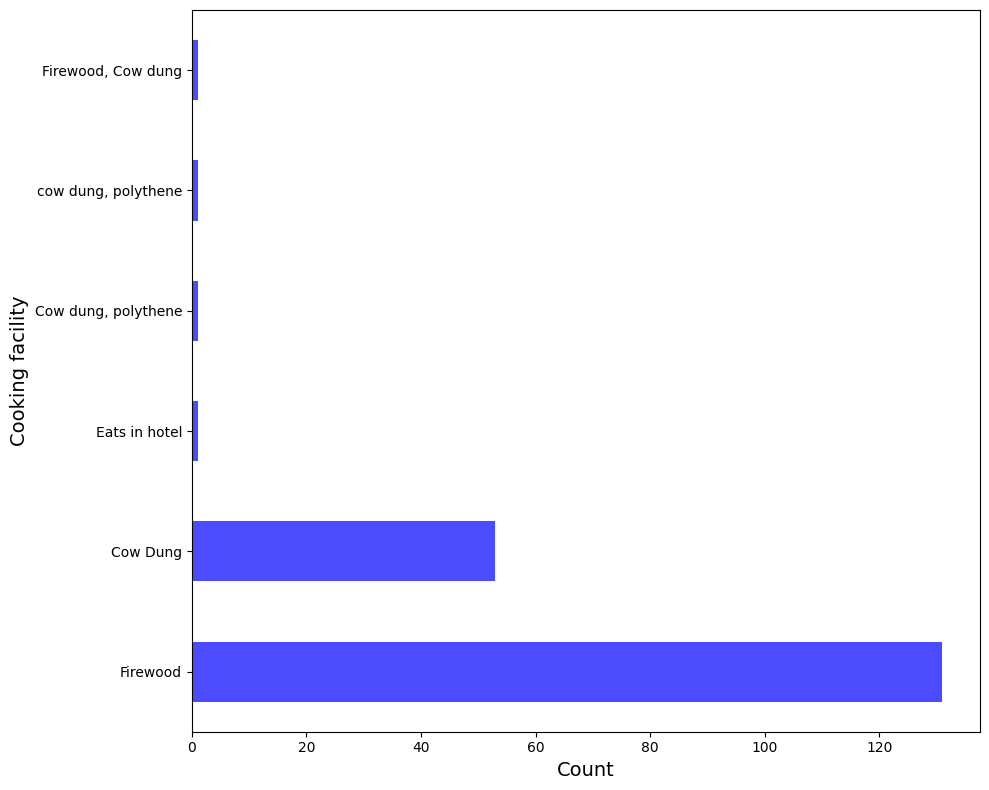

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Cooking facility:' column
livelihood_counts = df['Cooking facility:'].value_counts()

# Create a bar plot for the distribution of livelihoods
plt.figure(figsize=(10, 8))
livelihood_counts.plot(kind='barh', color='blue', alpha=0.7)
# plt.title("Distribution of All Cooking facility")
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Cooking facility", fontsize = 14)
plt.tight_layout()
plt.show()

Electricity/lighting facility

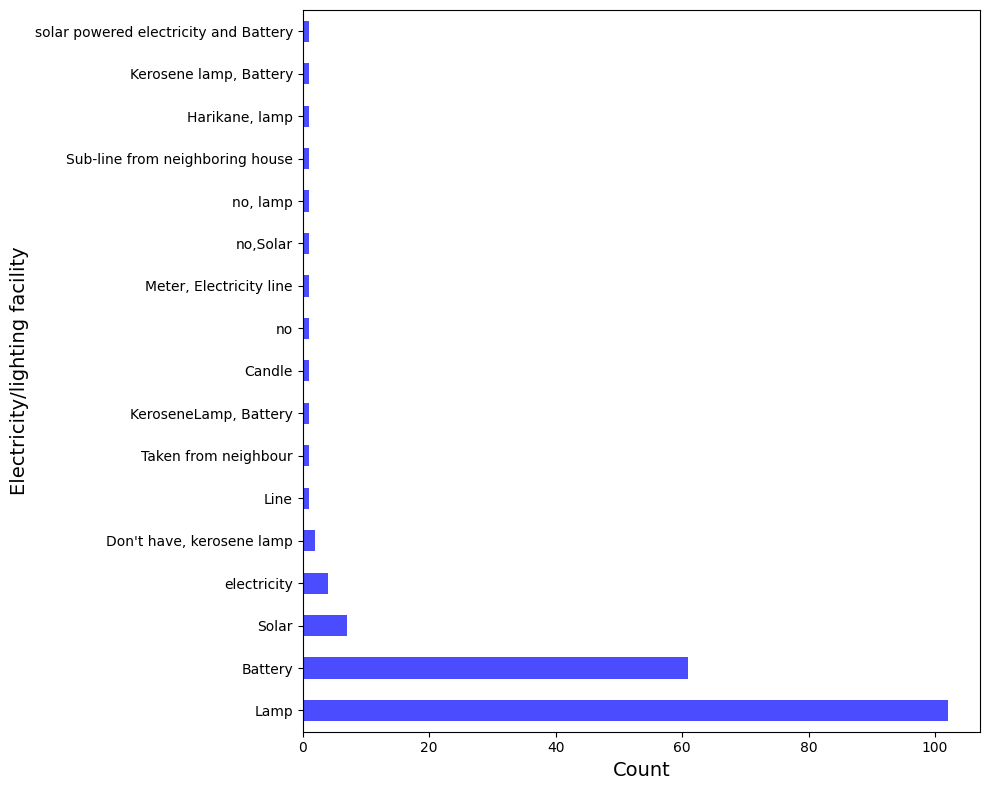

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Electricity/lighting facility:' column
livelihood_counts = df['Electricity/lighting facility:'].value_counts()

# Create a bar plot for the distribution of livelihoods
plt.figure(figsize=(10, 8))
livelihood_counts.plot(kind='barh', color='blue', alpha=0.7)
# plt.title("Distribution of All Electricity/lighting facility")
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Electricity/lighting facility", fontsize = 14)
plt.tight_layout()
plt.show()

Word cloud based on the "Electricity/lighting facility:" column

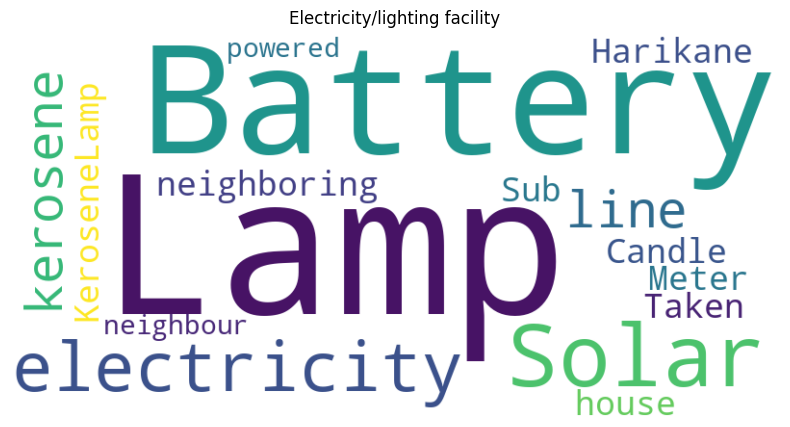

In [ ]:
# @title Code
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting the 'Electricity/lighting facility:' column and converting it into a single string
text = " ".join(problem for problem in df["Electricity/lighting facility:"].dropna())

# Creating the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Electricity/lighting facility")
plt.show()

Source of water for household activities:

Distribution of All Source of water for household activities

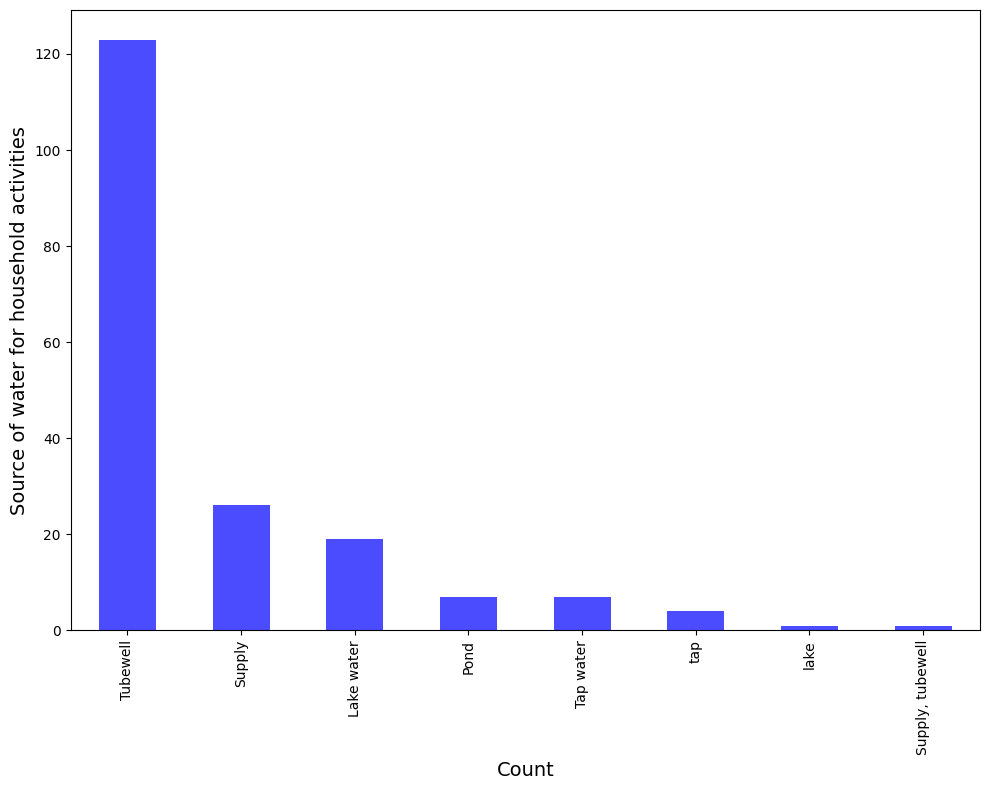

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Source of water for household activities' column
livelihood_counts = df['Source of water for household activities'].value_counts()

# Create a bar plot for the distribution of livelihoods
plt.figure(figsize=(10, 8))
livelihood_counts.plot(kind='bar', color='blue', alpha=0.7)
# plt.title("Distribution of All Source of water for household activities")
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Source of water for household activities", fontsize = 14)
plt.tight_layout()
plt.show()

Source of water for sanitation

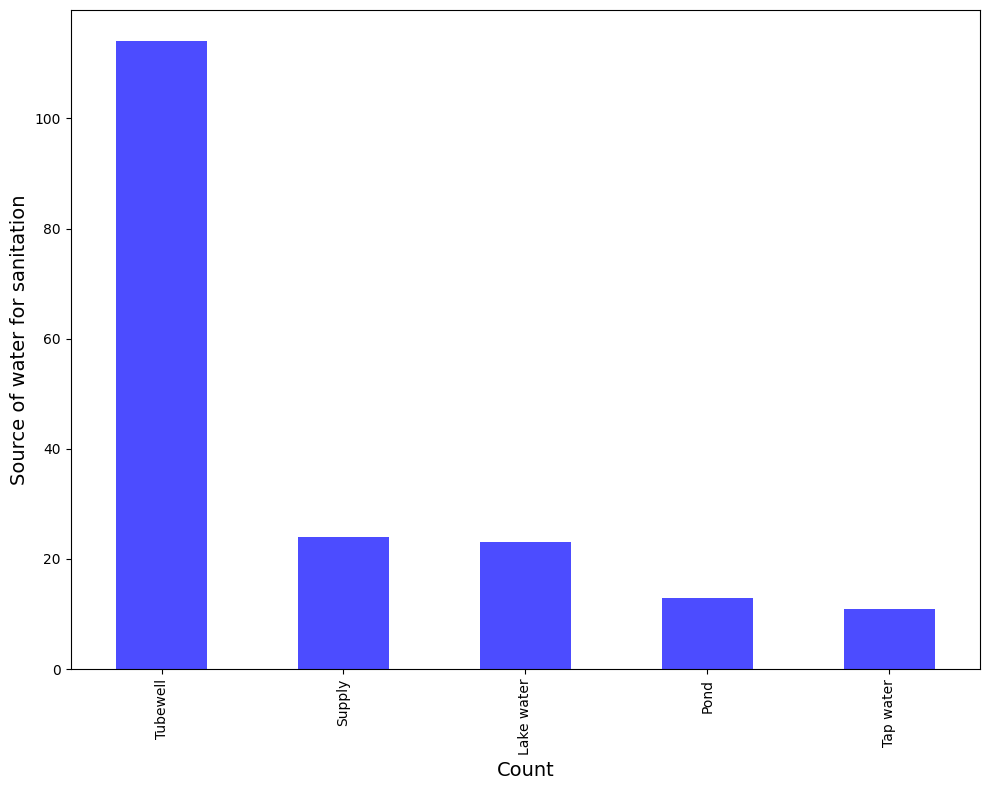

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Source of water for sanitation' column
livelihood_counts = df['Source of water for sanitation'].value_counts()

# Create a bar plot for the distribution of livelihoods
plt.figure(figsize=(10, 8))
livelihood_counts.plot(kind='bar', color='blue', alpha=0.7)
# plt.title("Distribution of All Source of water for sanitation")
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Source of water for sanitation", fontsize = 14)
plt.tight_layout()
plt.show()

Source of drinking water

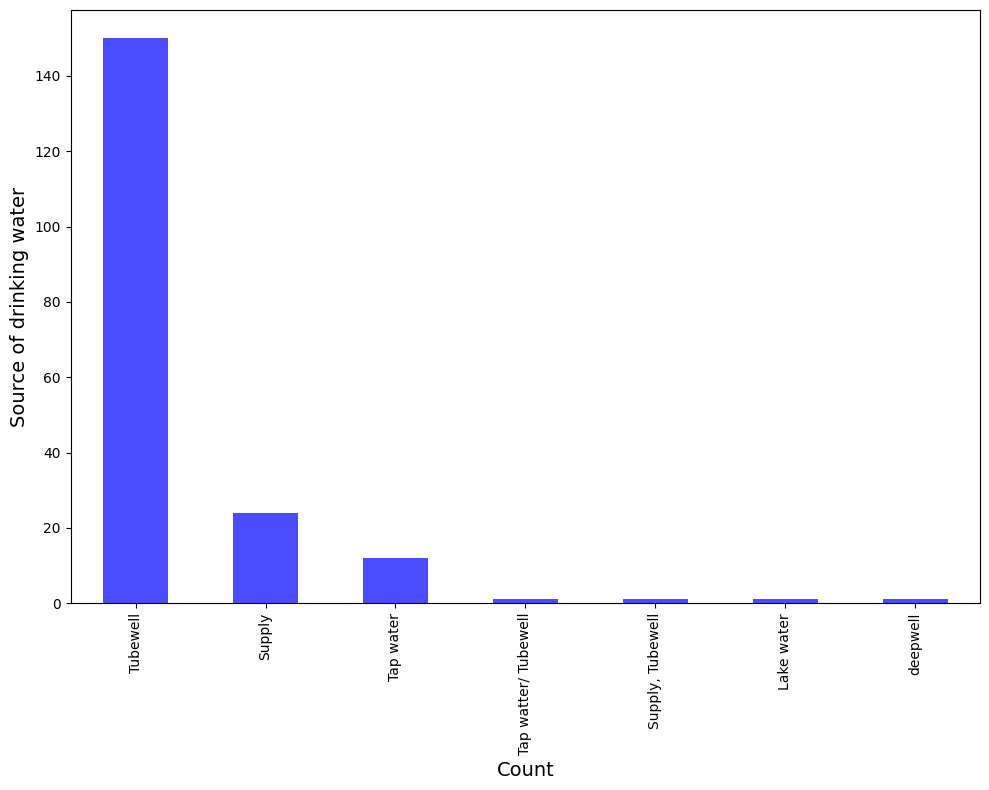

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Source of drinking water' column
livelihood_counts = df['Source of drinking water'].value_counts()

# Create a bar plot for the distribution of livelihoods
plt.figure(figsize=(10, 8))
livelihood_counts.plot(kind='bar', color='blue', alpha=0.7)
# plt.title("Distribution of All Source of drinking water")
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Source of drinking water", fontsize = 14)
plt.tight_layout()
plt.show()

Distribution of total water source: May need to fix this

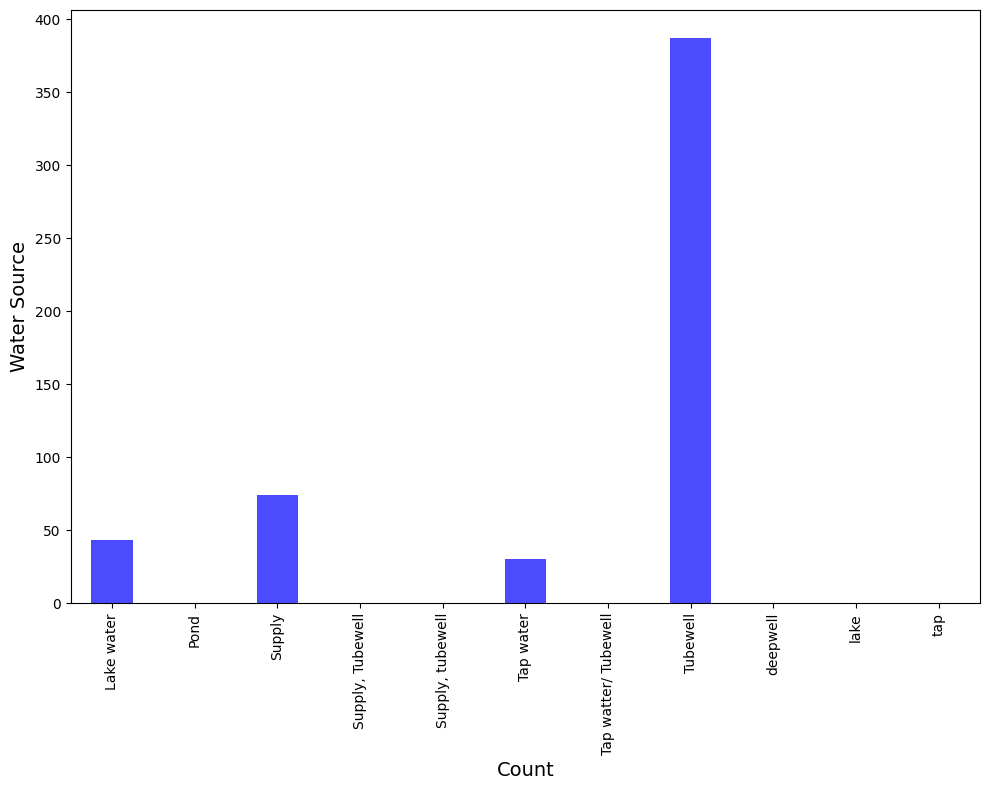

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the three water source columns and sum the counts
source_counts = df['Source of water for household activities'].value_counts() + \
               df['Source of water for sanitation'].value_counts() + \
               df['Source of drinking water'].value_counts()

# Create a bar plot for the distribution of total water sources
plt.figure(figsize=(10, 8))
source_counts.plot(kind='bar', color='blue', alpha=0.7)
# plt.title("Distribution of All Water Sources")
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Water Source", fontsize = 14)
plt.tight_layout()
plt.show()

Distribution of All Water Sources

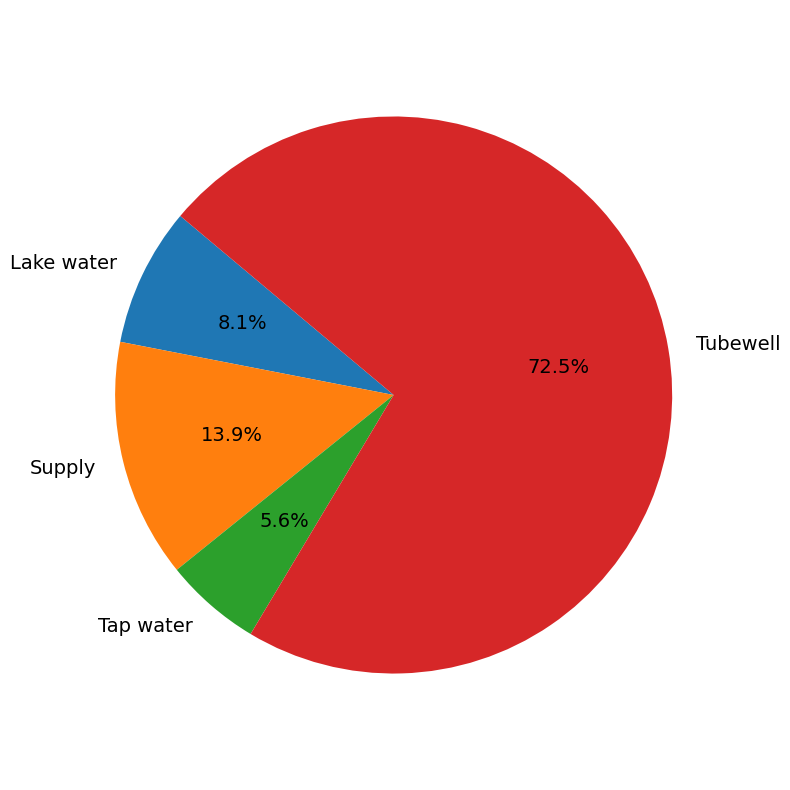

In [ ]:
# @title Code
import matplotlib.pyplot as plt

# Count the occurrences of each category in the three water source columns and sum the counts
source_counts = df['Source of water for household activities'].value_counts() + \
               df['Source of water for sanitation'].value_counts() + \
               df['Source of drinking water'].value_counts()

# Remove NaN values from source_counts
source_counts = source_counts.dropna()

# Create a pie chart for the distribution of total water sources
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
# plt.title("Distribution of All Water Sources")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

Word cloud based on the "Major problem with latrines" column

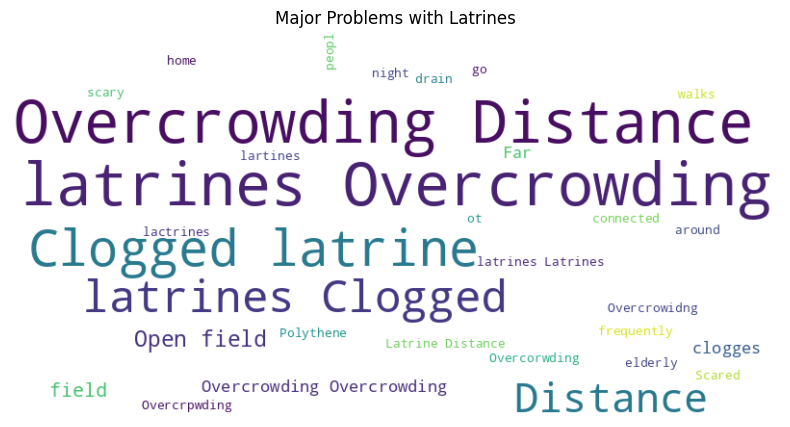

In [ ]:
# @title Code
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting the 'Major problem with latrines' column and converting it into a single string
text = " ".join(problem for problem in df["Major problem with latrines"].dropna())

# Creating the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Major Problems with Latrines")
plt.show()

Word cloud based on the "Problem with Bathing" column

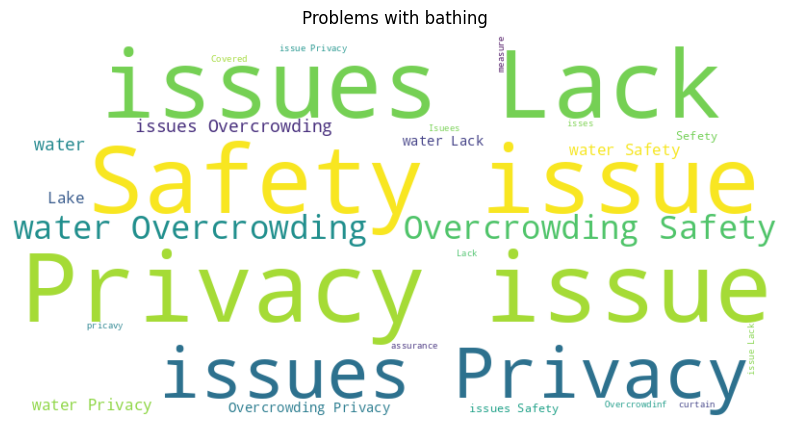

In [ ]:
# Extracting the 'Problems with bathing:' column and converting it into a single string
text = " ".join(problem for problem in df["Problems with bathing:"].dropna())

# Creating the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Problems with bathing')
plt.show()

resettled in Rajshahi City to slum relation diagram

In [ ]:
df = pd.read_csv("/content/Data Processed_15Nov23.csv")
df['How many times resettled in Rajshahi City Corporation only after first migrtion'].unique()

array([ 1,  2,  0, 21, 40, 20, 17, 16,  4, 19, 10, 30,  3, 25])

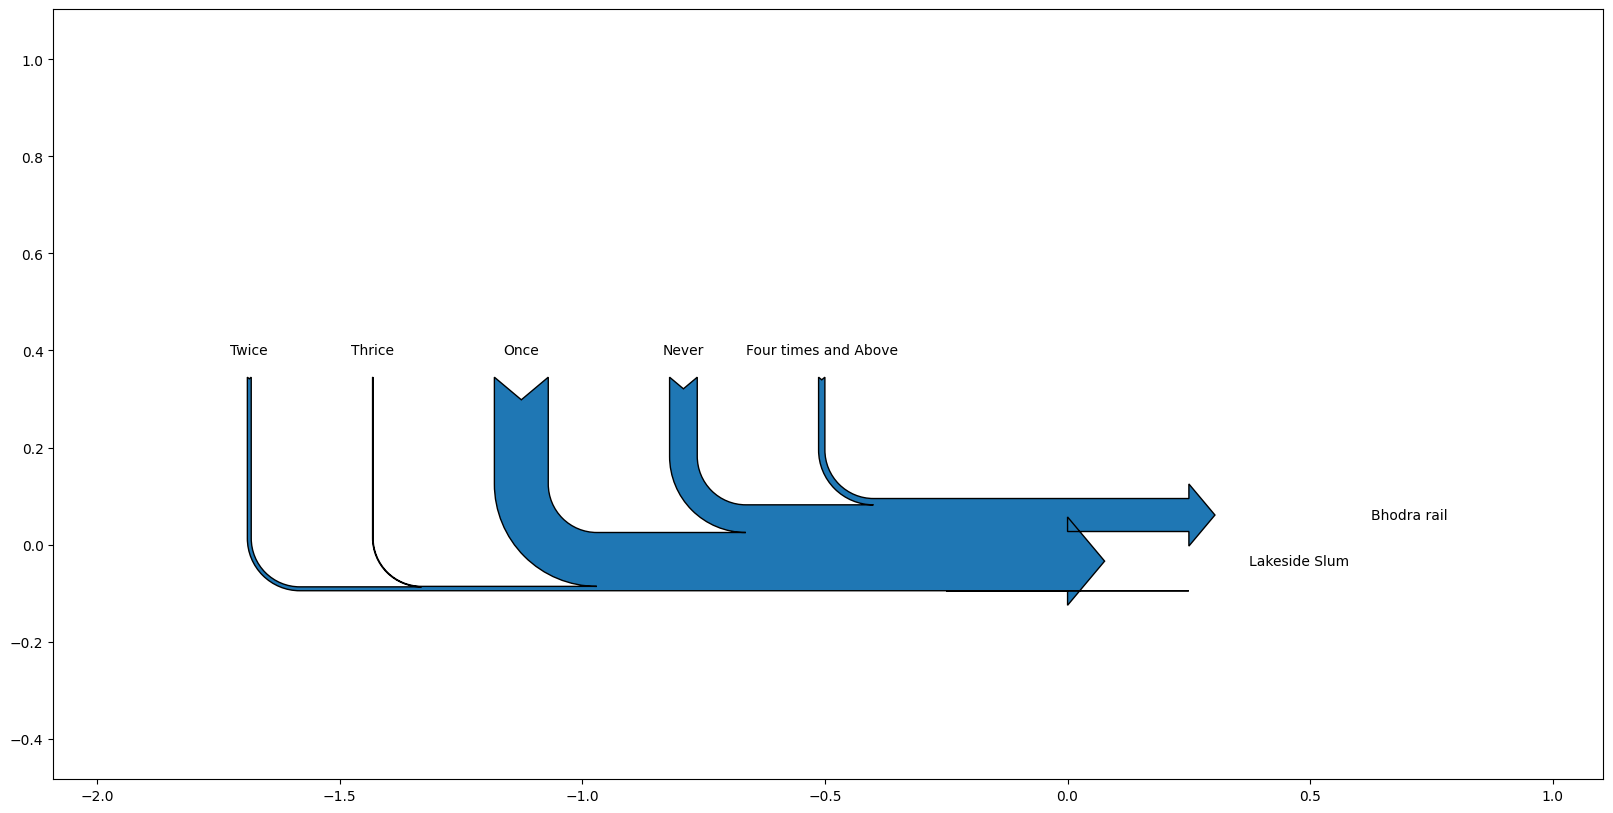

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
# Applying the mapping provided by the user to the dataframe
new_mapping = {
    0: 'Never',
    1: 'Once',
    2: 'Twice',
    3: 'Thrice',
    4: 'Four times and Above',
    21: 'Four times and Above',
    40: 'Four times and Above',
    20: 'Four times and Above',
    17: 'Four times and Above',
    16: 'Four times and Above',
    19: 'Four times and Above',
    30: 'Four times and Above',
    25: 'Four times and Above',
    10: 'Four times and Above'
}

# Apply the mapping to the 'How many times resettled...' column
df['How many times resettled in Rajshahi City Corporation only after first migrtion'] = df['How many times resettled in Rajshahi City Corporation only after first migrtion'].replace(new_mapping)

# Re-generate the sankey_data with the mapped values
sankey_data_mapped = df.groupby(['Slum Name', 'How many times resettled in Rajshahi City Corporation only after first migrtion']) \
                       .size() \
                       .reset_index(name='count')

# Repeating the process of creating flows and labels for the Sankey diagram with the new mapping
source_flows_mapped = sankey_data_mapped.groupby('Slum Name')['count'].sum().reset_index(name='count')
source_flows_mapped['count'] = -source_flows_mapped['count']

target_flows_mapped = sankey_data_mapped.groupby('How many times resettled in Rajshahi City Corporation only after first migrtion')['count'].sum().reset_index(name='count')

full_flows_mapped = pd.concat([source_flows_mapped, target_flows_mapped])

# Creating flows and labels for the Sankey diagram with the new mapping
flows_mapped = source_flows_mapped['count'].tolist() + target_flows_mapped['count'].tolist()
labels_mapped = source_flows_mapped['Slum Name'].tolist() + target_flows_mapped['How many times resettled in Rajshahi City Corporation only after first migrtion'].tolist()

# Creating the Sankey diagram with the mapped values
fig, ax = plt.subplots(figsize=(20, 10))
sankey_mapped = Sankey(ax=ax, unit=None, format='%d', scale=0.001, offset=0.4)
sankey_mapped.add(flows=flows_mapped, labels=labels_mapped, orientations=[0]*len(source_flows_mapped) + [1]*len(target_flows_mapped))
diagrams_mapped = sankey_mapped.finish()
# diagrams_mapped[0].text.set_text("Sankey diagram with Mapped Values")

# Adjust the y-position of the target flow labels to be at y=0.4
for text in diagrams_mapped[0].texts[-len(target_flows_mapped):]:
    x, y = text.get_position()
    text.set_position((x, 0.4))

plt.show()

Left side try with ward no. and right side with climate-non climate drivers

In [ ]:
df['Ward No:'].unique()

array([19, 27, 26])

Using a Sankey diagram to visualize the reasons for migration by ward can offer insights into:

Which wards have the highest number of migrations.
The primary reasons for migration in each ward.
Which migration reasons are the most common across all wards.
Here's the plan:

Source: Ward No.

Target: Reasons for migration columns you mentioned.

Value: Count of households that mentioned each reason for migration.

To represent this as percentages, I calculate the percentage of each reason for migration within each ward.

Let's proceed to create the Sankey diagram with this structure.

Trying to make the right side as count and not percentage (Not successful so far)

Reasons for Migration by Ward - Sankey diagram

In [ ]:
# @title Code
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv("/content/Data Processed_15Nov23.csv")
# Filter the dataset for relevant columns
migration_cols = [
    "Ward No:", "Drought", "Food insecurity",
     "River erosion", "Salinity in agricultural land",
     "Monsoon flood", "Storms/hurricanes/typhoons/tornadoes",
    "Absence of risk reduction measures against disaster",
    "Lack of livelihood alternatives", "Lack of Property/Asset",
    "Location of house/resident in vulnerable places"
]

# Filter the data
filtered_data = data.loc[:, migration_cols]

# Melt the data
melted_data = filtered_data.melt(id_vars=["Ward No:"], value_name="Reason")

# Filter out rows where Reason is not 1 (indicating "Yes")
melted_data = melted_data[melted_data["Reason"] == 1]

# Aggregate data
sankey_data = melted_data.groupby(["Ward No:", "variable"]).size().reset_index(name="Count")

# Calculate percentages
sankey_data["Percentage"] = sankey_data.groupby("Ward No:")["Count"].apply(lambda x: 100 * x / x.sum())

# Prepare data for Sankey diagram
sources = sankey_data["Ward No:"].astype(str).tolist()
targets = sankey_data["variable"].tolist()
values = sankey_data["Percentage"].tolist()
label_list = list(sankey_data["Ward No:"].unique().astype(str)) + list(sankey_data["variable"].unique())
source_indices = [label_list.index(x) for x in sources]
target_indices = [label_list.index(x) for x in targets]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=label_list),
    link=dict(source=source_indices, target=target_indices, value=values)
)])

fig.update_layout(font_size=14)
fig.show()

<ipython-input-93-6b9c6bc69b71>:29: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



Livelihood - pie of pie

In [ ]:
df['Current principal occupation (livelihood means):'].unique()

array(['Scrap collector', 'Beggar', 'Mason', 'Rickshaw pulller',
       'Mason, Household worker', 'Rickshaw pulller, Mason',
       'Small business', 'Scrap collector, Household worker', 'Day labor',
       'Tailor', 'Rickshaw pulller, Household worker',
       'Beggar, Scrap collector', 'Farmer, Household worker',
       'Security guard', 'Day laborer', 'Household worker, Van driver',
       'Farmer,Mason', 'Security guard, Scrap collector',
       'Beggar, Household worker', 'Day Labor', 'driver',
       'Scrap collector, Beggar', 'Small business, Scrap collector',
       'Scrap collector, Rickshaw pulller', 'Rickshae pulller, Farmer',
       'Small Business', 'Auto driver', 'Househeld Worker', 'Van driver',
       'Riskshaw puling', 'Nut Seller', 'Steel machanic',
       'Household worker', nan, 'Riskshaw puling, Household worker',
       'Motor Mechanic'], dtype=object)

BUS DRIVER Values problem

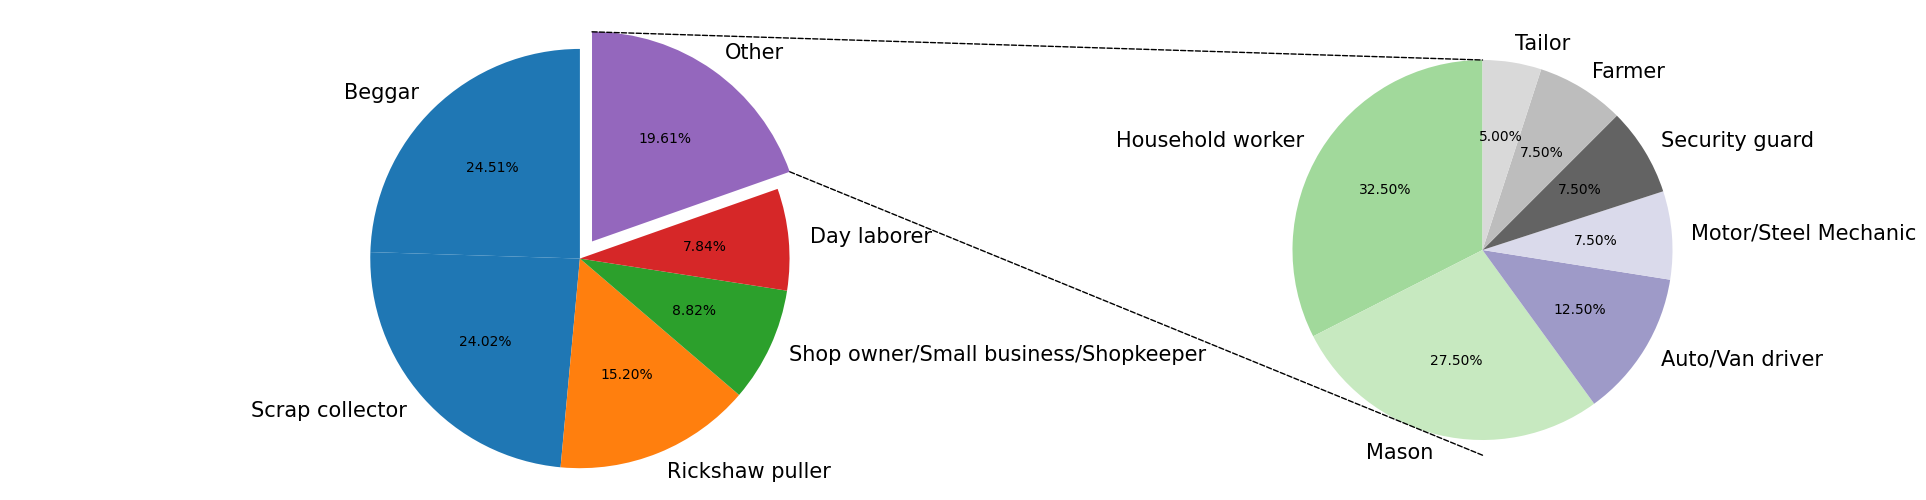

In [ ]:
# Adjust the pie of pie chart according to the new requirements:
# 1. Remove the counts from the autopct in the wedges.
# 2. Adjust the figure size and text properties for clarity and to prevent clutter.
# 3. Draw two lines starting from the two corners of the 'Other' slice in the main pie
#    and ending at the top and bottom of the small pie.

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# It appears there might have been a misunderstanding regarding the specific columns.
# To clarify, we will attempt to locate the specific job columns mentioned by the user within the dataset.
specific_job_columns = [
    'Motor/Steel Mechanic', 'Bus driver', 'Auto/Van driver', 'Tailor', 'Day laborer',
    'Security guard', 'Farmer', 'Shop owner/Small business/Shopkeeper', 'Household worker',
    'Rickshaw puller', 'Mason', 'Beggar', 'Scrap collector'
]

# Check if these specific job columns are present in the data
columns_present = [col for col in specific_job_columns if col in df.columns]

# If the columns are not found, we will need to inform the user and try a different approach.
# If they are found, we will proceed to create the pie of pie chart.
if not columns_present:
    print("The specific job columns listed are not present in the dataset.")
else:
    # If the columns are found, we will aggregate the data from these columns.
    # Assuming that each row represents a person and the value in the job column is a marker of their occupation (e.g., 1 for yes, 0 for no).
    job_data = df[columns_present].sum().sort_values(ascending=False)

    # Select the top 5 jobs and sum the rest into an 'Other' category.
    top_jobs = job_data.head(5)
    other_jobs_sum = job_data[5:].sum()
    top_jobs['Other'] = other_jobs_sum

    # For the second pie, which will show the distribution of the 'Other' jobs.
    other_jobs_detail = job_data[5:]

# Function to calculate just the percentage for the pie slice labels
def make_autopct(values):
    def my_autopct(pct):
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

# Setup figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[19, 6], gridspec_kw={'width_ratios': [2, 1]})

# Explode 'Other' slice for better visibility
explode_main = [0]*5 + [0.1]

# Colors for the main pie chart
colors_main = plt.cm.tab10(np.linspace(0, 1, 12))

# Colors for the 'Other' pie chart, continuing from the end of the main colors
colors_other = plt.cm.tab20c(np.linspace(0.5, 1, len(other_jobs_detail)))
# Main pie chart
wedges1, texts1, autotexts1 = ax1.pie(top_jobs.values,explode=explode_main, labels=top_jobs.index, autopct=make_autopct(top_jobs.values),
       startangle=90, colors=colors_main)

# Secondary pie chart (Other jobs breakdown)
wedges2, texts2, autotexts2 = ax2.pie(other_jobs_detail.values, labels=other_jobs_detail.index, autopct=make_autopct(other_jobs_detail.values),
       startangle=90, colors=colors_other)

# Connection lines for the 'Other' category
# Calculate the angle for the 'Other' slice to place the lines appropriately
theta1 = ax1.patches[-1].theta1
theta2 = ax1.patches[-1].theta2
center, r = ax1.patches[-1].center, ax1.patches[-1].r

# Determine the end points of the lines in the small pie
end_points = [(0, -1.08), (0, 1)]

# Create connection in the plot
con1 = ConnectionPatch(xyA=(center[0] + r * np.cos(np.pi/180*theta1), center[1] + r * np.sin(np.pi/180*theta1)),
                       xyB=end_points[0], coordsA="data", coordsB="data",
                       axesA=ax1, axesB=ax2, color="black", linestyle='--')
con2 = ConnectionPatch(xyA=(center[0] + r * np.cos(np.pi/180*theta2), center[1] + r * np.sin(np.pi/180*theta2)),
                       xyB=end_points[1], coordsA="data", coordsB="data",
                       axesA=ax1, axesB=ax2, color="black", linestyle='--')
ax2.add_artist(con1)
ax2.add_artist(con2)

# Adjust the position of the axes for aesthetics
# ax1.set_position([0.1, 0.1, 0.4, 0.8])
# ax2.set_position([0.7, 0.1, 0.4, 0.8])

# Adjust the position of the axes for aesthetics
ax1.set_position([0.1, 0.1, 0.6, 0.8])  # Adjusted width for ax1
ax2.set_position([0.75, 0.1, 0.25, 0.8])  # Adjusted position and width for ax2

# Improve the text and number spread to prevent clutter
for text in autotexts1 + autotexts2:
    text.set_size('medium')
for text in texts1 + texts2:
    text.set_size('medium')

# Set aspect ratio to be equal so that pie is drawn as a circle and adjust the layout.
ax1.axis('equal')
# ax2.axis('equal')

# Increase text size for labels on the main pie chart
for text in texts1:
    text.set_fontsize(15)  # Adjust the font size as needed

# Increase text size for labels on the 'Other' pie chart
for text in texts2:
    text.set_fontsize(15)  # Adjust the font size as needed

# Show the pie of pie chart with the adjustments
plt.show()

Heatmap of Bangladesh (Migration pattern)

In [ ]:
df = pd.read_csv("/content/Data Processed_15Nov23.csv")
df['Migrated From'].unique()

array(['Nilphamari', 'Gaibandha', 'Noakhali', 'Rajshahi', 'Naogaon',
       'Faridpur', 'Lalmonirhat', 'Rangpur', 'Pabna', 'Shirajganj',
       'Bogura', 'Natore', 'Dinajpur', 'Bagura', 'Bagerhat', 'India',
       'Shirajgonj', 'Dhaka', 'Kurigram', 'Sylhet', 'Kushtia'],
      dtype=object)

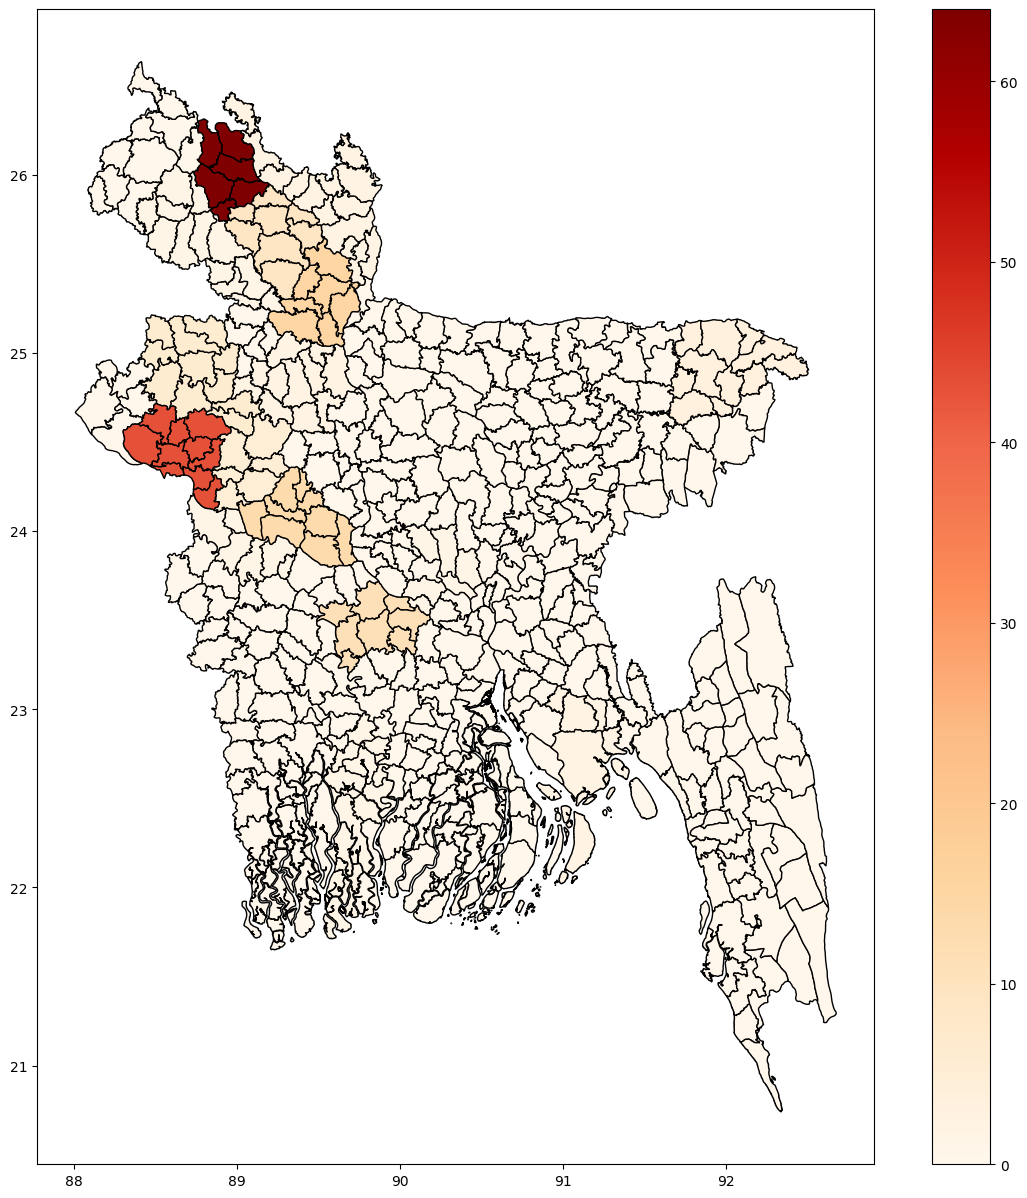

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Bangladesh districts shapefile
gdf = gpd.read_file('/content/bangladesh.geojson')

# Load the dataset
df = pd.read_csv('/content/Data Processed_15Nov23.csv')

# Reapplying the correct mapping to the 'Migrated From' column
df['Migrated From'] = df['Migrated From'].replace(mapping)

# Recounting the number of occurrences of each district after applying the correct mapping
district_counts_corrected = df['Migrated From'].value_counts()

mapping_for_geojson_corrected = {
    'Nilphamari': 'Nilphamari',
    'Gaibandha': 'Gaibanda',
    'Noakhali': 'Noakhali',
    'Rajshahi': 'Rajshahi',
    'Naogaon': 'Naogaon',
    'Faridpur': 'Faridpur',
    'Lalmonirhat': 'Lalmonirhat',
    'Rangpur': 'Rongpur',
    'Pabna': 'Pabna',
    'Sirajgonj': 'Sirajgonj',
    'Bogura': 'Bogra',
    'Natore': 'Natore',
    'Dinajpur': 'Dinajpur',
    'Bagerhat': 'Bagerhat',
    'Dhaka': 'Dhaka',
    'Kurigram': 'Kurigram',
    'Sylhet': 'Sylhet',
    'Kushtia': 'Kustia'
}

# Applying the corrected mapping to our district count data
district_counts_mapped_corrected = district_counts_corrected.rename(index=mapping_for_geojson_corrected)

# Creating a dictionary to map the district names from our data to the corresponding names in the geojson.
# This mapping is based on the observed district names in both lists.


# The error indicates a column overlap. Let's manually specify the column names to avoid this issue.
# We will rename the 'count' column in the district_counts_mapped_corrected to avoid overlap.
# The error indicates a column overlap. Let's manually specify the column names to avoid this issue.
# We will rename the 'count' column in the district_counts_mapped_corrected to avoid overlap.

# Renaming the 'count' column to avoid overlap
district_counts_mapped_corrected = district_counts_mapped_corrected.rename('migration_count')

# Merging the modified counts with the geo data frame
gdf_mapped_corrected = gdf.set_index('NAME_3').join(district_counts_mapped_corrected, how='left')

# Replace NaN values with 0 in the 'migration_count' column
gdf_mapped_corrected['migration_count'] = gdf_mapped_corrected['migration_count'].fillna(0)

# Plotting the corrected heatmap with the accurate mapping
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_mapped_corrected.plot(column='migration_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
# plt.title('Accurately Mapped Heatmap of Migration by District in Bangladesh')
plt.show()

In [ ]:
# gdf['NAME_3'].unique()

In [ ]:
# Let's first inspect the unique values in the 'Migrated From' column and the district names in the GeoDataFrame
# to ensure proper alignment for the heatmap.

unique_districts_in_data = df['Migrated From'].unique()
unique_districts_in_geojson = gdf['NAME_2'].unique()

unique_districts_in_data, unique_districts_in_geojson

(array(['Nilphamari', 'Gaibandha', 'Noakhali', 'Rajshahi', 'Naogaon',
        'Faridpur', 'Lalmonirhat', 'Rangpur', 'Pabna', 'Shirajganj',
        'Bogura', 'Natore', 'Dinajpur', 'Bagura', 'Bagerhat', 'India',
        'Shirajgonj', 'Dhaka', 'Kurigram', 'Sylhet', 'Kushtia'],
       dtype=object),
 array(['Barisal', 'Khulna', 'Kishoreganj', 'Chittagong', 'Patuakhali',
        'Bandarban', 'Dhaka', 'Comilla', 'Khagrachari', 'Noakhali',
        'Rangamati', 'Faridpur', 'Jamalpur', 'Kushtia', 'Mymensingh',
        'Tangali', 'Jessore', 'Bogra', 'Dinajpur', 'Pabna', 'Rajshahi',
        'Ranpur', 'Sylhet'], dtype=object))

CLIMATE VS NON CLIMATE MAP

In [ ]:
# Columns for climate reasons
climate_reasons_columns = [
    'Drought', 'Food insecurity', 'River erosion', 'Salinity in agricultural land',
    'Monsoon flood', 'Storms/hurricanes/typhoons/tornadoes'
]

# Columns for non-climate reasons
non_climate_reasons_columns = [
    'Absence of risk reduction measures against disaster', 'Lack of livelihood alternatives',
    'Lack of Property/Asset', 'Location of house/resident in vulnerable places'
]

# Re-filtering the dataframe for rows where at least one of the climate reasons is marked as 1
df_climate_filtered = df.loc[df[climate_reasons_columns].sum(axis=1) > 0]
df_non_climate_filtered = df.loc[df[non_climate_reasons_columns].sum(axis=1) > 0]

# Summing up the migration counts based on climate reasons for each district
climate_migration_counts = df_climate_filtered['Migrated From'].value_counts().rename('climate_migration_count')
non_climate_migration_counts = df_non_climate_filtered['Migrated From'].value_counts().rename('non_climate_migration_count')

In [ ]:
df['Migrated From'].value_counts()

Nilphamari     64
Rajshahi       43
Gaibandha      15
Pabna          13
Faridpur       11
Rangpur         9
Naogaon         6
Natore          5
India           3
Sylhet          3
Shirajganj      3
Kurigram        2
Shirajgonj      2
Bogura          2
Lalmonirhat     2
Noakhali        2
Bagerhat        1
Bagura          1
Dinajpur        1
Dhaka           1
Kushtia         1
Name: Migrated From, dtype: int64

In [ ]:
climate_migration_counts

Nilphamari     63
Rajshahi       41
Gaibandha      15
Pabna          13
Faridpur       11
Rangpur         9
Naogaon         6
Natore          5
India           3
Sylhet          3
Shirajganj      3
Kurigram        2
Shirajgonj      2
Bogura          2
Lalmonirhat     2
Noakhali        2
Bagerhat        1
Bagura          1
Dinajpur        1
Dhaka           1
Kushtia         1
Name: climate_migration_count, dtype: int64

In [ ]:
non_climate_migration_counts

Nilphamari     60
Rajshahi       42
Gaibandha      13
Faridpur       11
Pabna          11
Rangpur         8
Naogaon         6
Natore          4
India           3
Sylhet          3
Shirajganj      3
Kurigram        2
Shirajgonj      2
Bogura          2
Lalmonirhat     2
Noakhali        2
Bagerhat        1
Bagura          1
Dinajpur        1
Dhaka           1
Kushtia         1
Name: non_climate_migration_count, dtype: int64

First one is Heatmap of Migration by District in Bangladesh due to Climate Reasons and 2nd one is Heatmap of Migration by District in Bangladesh due to Non Climate Reasons

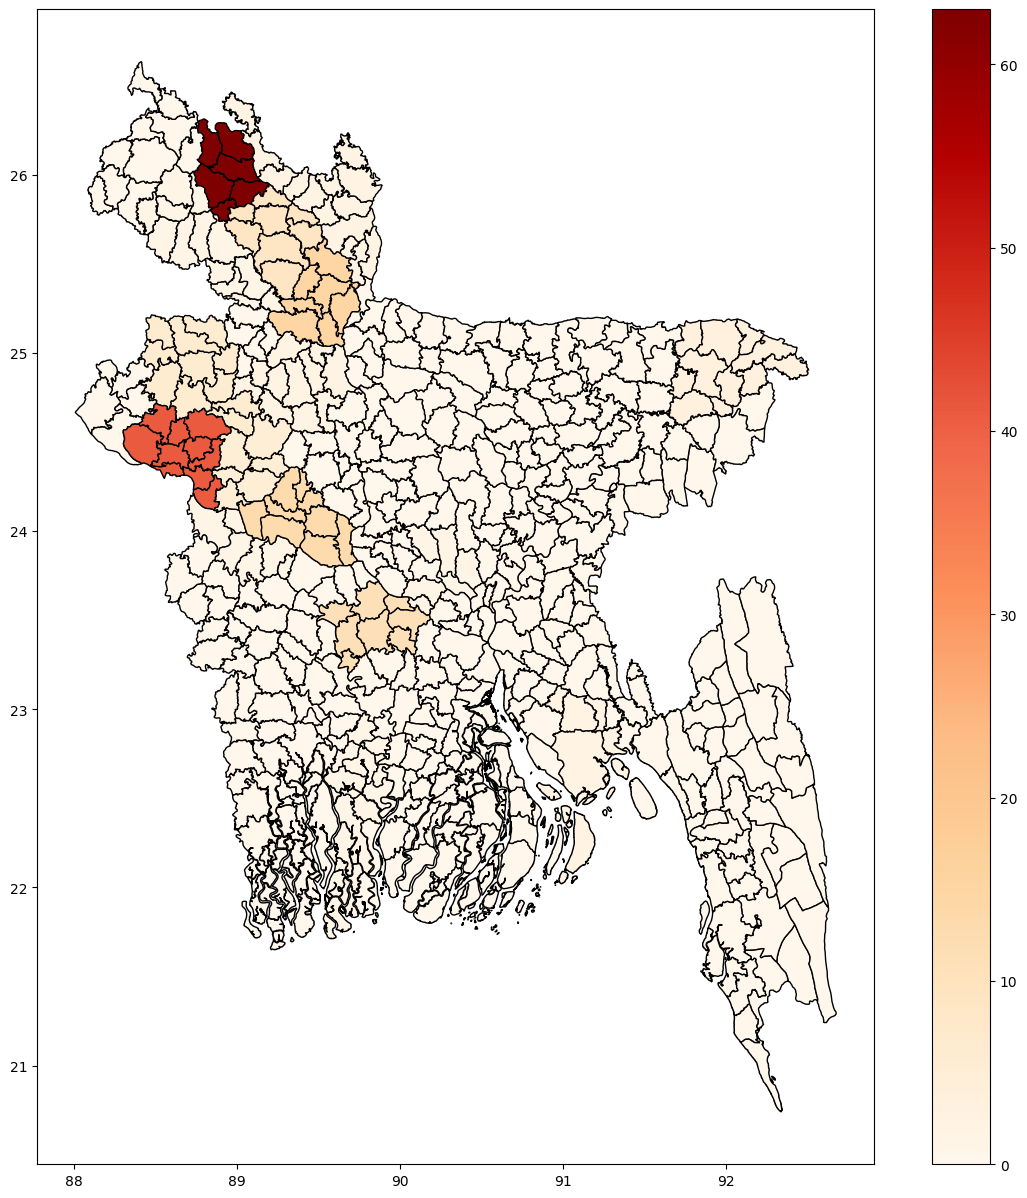

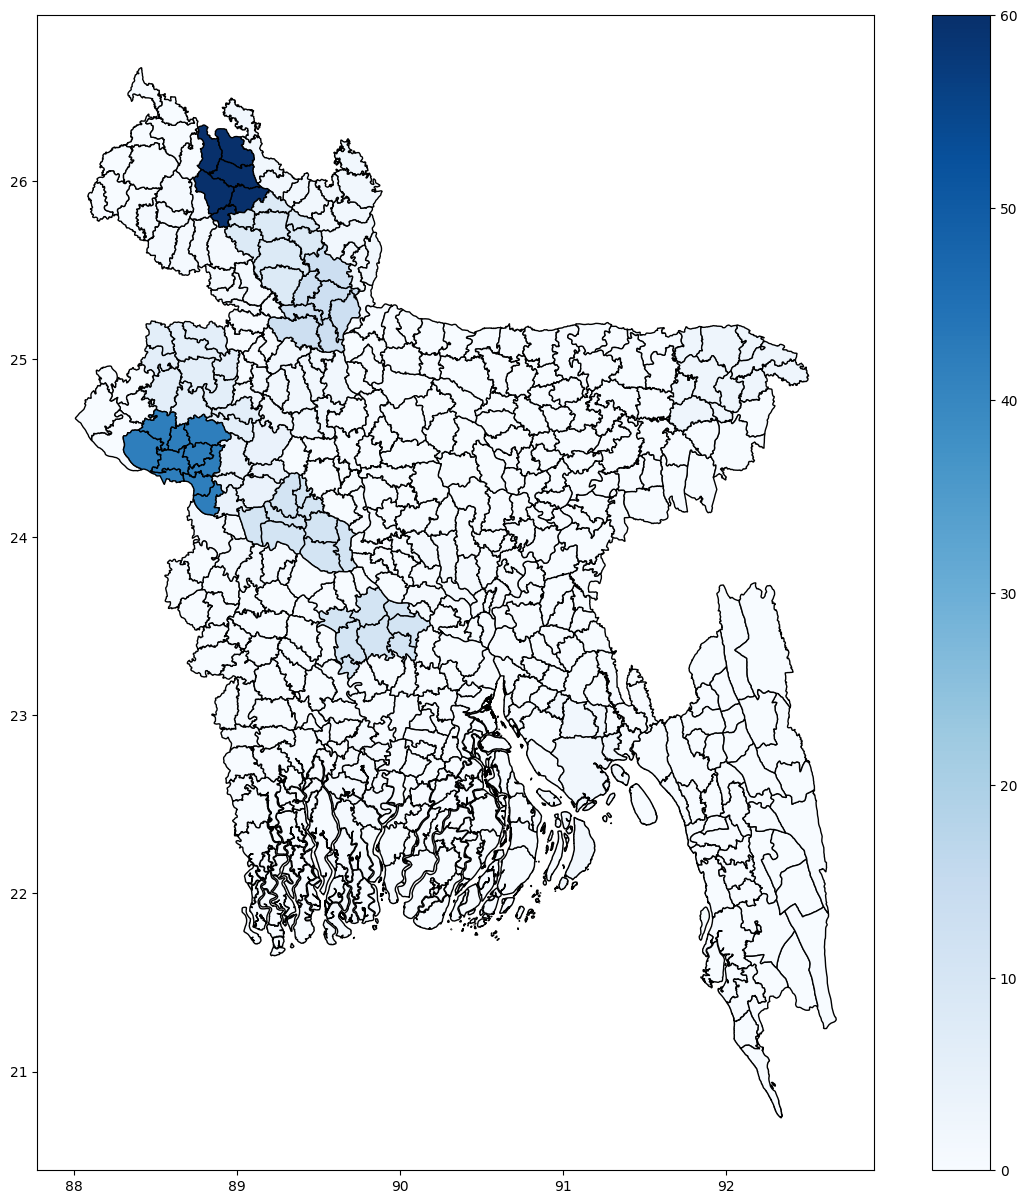

In [ ]:
# Applying the corrected mapping to our district count data
climate_migration_counts_mapped = climate_migration_counts.rename(index=mapping_for_geojson_corrected)
non_climate_migration_counts_mapped = non_climate_migration_counts.rename(index=mapping_for_geojson_corrected)

# Merging the modified counts with the geo data frame
gdf_climate_mapped = gdf.set_index('NAME_3').join(climate_migration_counts_mapped, how='left')
gdf_non_climate_mapped = gdf.set_index('NAME_3').join(non_climate_migration_counts_mapped, how='left')

# Replace NaN values with 0 in the 'climate_migration_count' and 'non_climate_migration_count' columns
gdf_climate_mapped['climate_migration_count'] = gdf_climate_mapped['climate_migration_count'].fillna(0)
gdf_non_climate_mapped['non_climate_migration_count'] = gdf_non_climate_mapped['non_climate_migration_count'].fillna(0)

# Plotting the climate heatmap with the accurate mapping
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_climate_mapped.plot(column='climate_migration_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
# plt.title('Heatmap of Migration by District in Bangladesh due to Climate Reasons')
plt.show()

# Plotting the non-climate heatmap with the accurate mapping
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_non_climate_mapped.plot(column='non_climate_migration_count', ax=ax, legend=True, cmap='Blues', edgecolor='black')
# plt.title('Heatmap of Migration by District in Bangladesh due to Non-Climate Reasons')
plt.show()